<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Assignment 3</strong></h1>

Comprehensive data preparation, exploration, visualization, feature engineering, and classification modeling for a case study: Predict house price range in Hanoi from 2020 periods.


<b> Group: 10</b>
+ Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
+ Student Name: Tran Ngoc Anh Thu (s3879312)</b>
+ Student Name: Ho Le Minh Thach (s3879312)</b>
+ Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price for improving the living standard.

# Hypothesis forming:

> Are more houses sold in the week day day than in the weekend?

> Is the house price on the weekend is lower than in the week day?

> Are more Houses are sold in the end of the year?

> Is the house price has highest price in the end of the year December?

> Does the plots have higher price have Available Legal Documents, the number of floors higher than 2, the number of bedrooms higher than 2, the Area is higher than 50 metersquare, the house type is Street House or Villa, Locate in the center of Hanoi or urban city?

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Rename Column](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Types](#2.2)

2.2.1 [Format Data Features](#2.2.1)

2.2.2 [Remove Unit for Measurement](#2.2.2)

2.2.3 [Remove Prefix & Typo Check](#2.2.3)

2.3 [Translate The Content](#2.3)

2.4 [Uppercase the Content](#2.4)

2.5 [Missing Values](#2.5)

2.6 [Check data types & Make the data homogeneous](#2.6)

2.7 [Extra-whitespaces](#2.7)

2.8 [Sanity Checks](#2.8)

2.9 [Checking for Impossible values & Outliers](#2.9)

2.9.1 [Some domain knowledge](#2.9.1)

2.9.2 [Descriptive Statistics for Central Tendency](#2.9.2)

2.9.3 [Descriptive Statistics for Variability](#2.9.3)

2.9.4 [Remove Impossible Values](#2.9.4)

2.10 [Create Categorical Price](#2.10)

2.11 [Save The Intermediate Data](#2.11)

<br>

### 3. [Data Exploration (EDA)](#3)
3.1 [Frequency of each corresponiding Target variable type](#3.1)

3.2 [Determine Location (urban & suburban) influence on price](#3.2)

3.3 [Legal Document Factor](#3.3)

3.4 [The most common Wards](#3.4)

<br>

### 4. [Feature Engineering](#4)
4.1 [Drop Unrelated columns to the target](#4.1)

4.2 [Class imbalances](#4.2)

4.3 [Encoding](#4.3)

<br>

### 5. [Model Building](#5)
5.1 [Train/Test split](#5.1)

5.2 [Simple Logistic Regression as Baseline](#5.2)

5.3 [Random Forest with Pipelines](#5.3)

5.4 [Combining GridSearch + Random Forest with Pipelines](#5.4)

<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.2"></a>
# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
%time

# set the path of the external data from the third party source - Kaggle
external_data_path = os.path.join(os.path.pardir, '', 'data','external')
VN_housing_dataset = os.path.join(external_data_path, 'VN_housing_dataset.csv')


# import test dataset
df = pd.read_csv(VN_housing_dataset, delimiter=',', skipinitialspace = True)

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.drop('Unnamed: 0', 1, inplace=True)
df.head(3)

Wall time: 0 ns
The shape of the ORGINAL data is (row, column): (82497, 13)


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="1.3"></a>
## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The `Ngày` will be the date which will contain all the day, month, year value
- The `Địa chỉ` will be the address which contains the street, ward, district, city
- The `Quận` is district
- The `Huyện` is not suppose to be the ward. However, the content they have is actually the ward
- The `Loại hình nhà ở` is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The `Giấy tờ pháp lý` is the legal document either already have, or on waiting, or others documents.
- The `Số tầng` is the number of floor
- The `Số phòng ngủ` is the number of bedroom
- The `Diện tích` is the area unit in meter square
- The `Dài` is the length unit in meter
- The `Rộng` is the width unit in meter
- The `Giá/m2`is the price in million VND per meter square

In [4]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

<a id="2.1"></a>
## About This Dataset
***

Now let's go through the features and describe a little:
***
**Categorical:**
- **Nominal**
    > - **Address**: a string describe full address of the house in Hanoi 
    > - **District**: a string describe the district the house is located
    > - **Ward**: a string describe the ward the house is located
    > - **Housing_type**: a string describe the type of house including byroad, street house, villa, townhouse
    > - **Legal_documents**: a string describe the status of legal documents including available, on waiting, others
- **Ordinal**
    > - **No_room**: a string describe the number of bedroom in the house
    > - **No_floor**: a string describe the house's floor quantity
***
**Numeric:**
- **Continuous**
  >  - **Area**: a string describe the area of the house in meter square
  >  - **Length**: a string describe the length of the house's area in meter
  >  - **Width**: a string describe the width of the house's area in meter
  >  - **Price**: a string describe the cost in million VND of each meter square
***
**Date/time:**
- **Date**(Nominal variable): a string describe the date the house is upload on alonhadat.com.vn

<a id="2.2"></a>
## Data types
***

<a id="2.2.1"></a>
### Format date features

In [5]:
# Now let's create new features from date column

# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

# get the month and year
df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


### ------------> OBSERVATION
<hr>

> We will process the column 'Area', 'Length', 'Width' and 'Price' and turn it into a continuous numerical value. Firstly we will remove all the unit of each column, and then we will replace ',' to '.' for the price column because the string need to be in the correct format before convert to float value. Then we will convert those columns into numerical value.

<hr>

<a id="2.2.2"></a>
### Remove Unit for Measurement

In [6]:
# remove the unit
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

# convert the value into float for all the column 'Area', 'Length', 'Width', 'Price'
coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

<a id="2.2.3"></a>
### Remove prefix & Typo check
We will process column 'District', 'Ward' by removing its repeative prefix. This will help us extract only the name of the district and ward.

In [7]:
# remove the prefix to only extract the district name
df['District'] = df['District'].replace('Quận\s', '', regex=True)

# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [8]:
# remove the prefix to only extract the ward name
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

### ------------> OBSERVATION

> After cleaning the address, we will look at the remaining categories column. We will look at their unique value, and replace Vietnamese by English term for further process. We also remove prefix in column 'No_floor' and 'No_room'.

In [9]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [10]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [11]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





As you can see, we need to remove the suffix in the column No_bedroom

In [12]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





<a id="2.3"></a>
### Translate the content
We will now translate the content of these 4 columns. As you can see the house type will have 4 values including byroad, street house, villa, and townhouse. These are the finnest word that we can find to clearly represent the meaning in Vietnamese. Similarly for the column legal documents where it will has 3 values including available, waiting, and others. For the No_floor and No_bedroom, we translate the phrase "greater than 10" value.

In [13]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


<a id="2.4"></a>
### Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

In [14]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


<a id="2.5"></a>
## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Address             48     0.06
Ward                48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


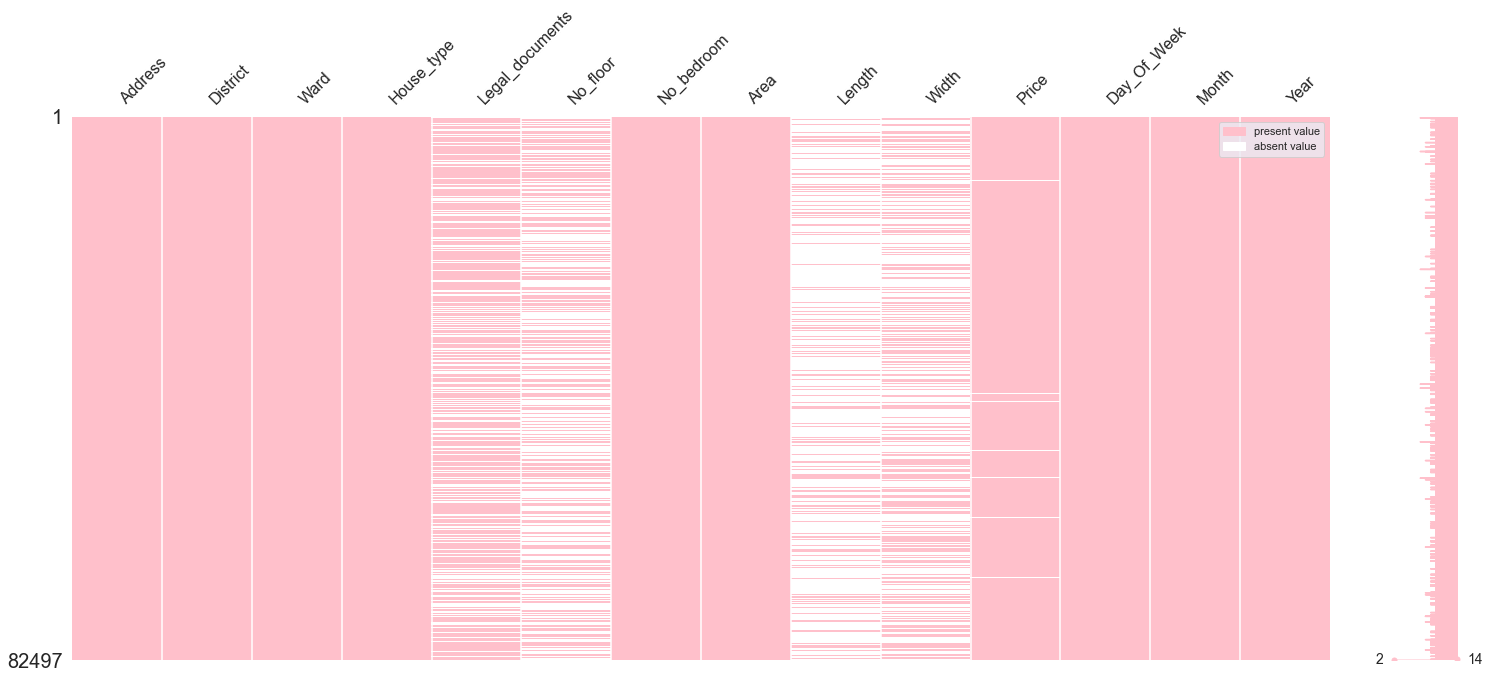

In [15]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


> I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
> From the graph, I can see a strong correlation the strong correlation between `Legal_documents`, `No_floor`, `Length` and `Width`.


<hr>

In [16]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.6"></a>
## Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [17]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address             string
District            string
Ward                string
House_type          string
Legal_documents     string
No_floor            string
No_bedroom          string
Area               Float64
Length             Float64
Width              Float64
Price              Float64
Day_Of_Week         string
Month                int32
Year                 int32
dtype: object 




In [18]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))

# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)

# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [19]:
# extract the value date to get the day of week
df['Day_Of_Week'].value_counts(dropna=False)

TUESDAY      14310
MONDAY       13888
WEDNESDAY    12459
THURSDAY     12425
FRIDAY       12170
SATURDAY     10669
SUNDAY        6573
Name: Day_Of_Week, dtype: Int64

In [20]:
# check the unique value of the month
df['Month'].value_counts(dropna=False)

7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: Month, dtype: int64

In [21]:
# check the unique value of the year
df['Year'].value_counts(dropna=False)

2020    82476
2019       18
Name: Year, dtype: int64

In [22]:
# check the unique value of legal_documents to to see if the value is completely translated
df['Legal_documents'].value_counts(dropna=False)

AVAILABLE    52912
NaN          28886
WAITING        356
OTHERS         340
Name: Legal_documents, dtype: Int64

### ---------------> OBSERVATION:

> As you can see, the Legal_documents contains a great amount of missing value. Instead of filling the missing value with mode which is AVAILABLE, it will be better to fill it with OTHERS. It is safe to assume if a house's legal documents is not listed, we can said that the house is OTHERS which is not AVAILABLE OR WAITING.

In [23]:
# fill the missing value for Legal_documents by 'OTHERS'
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [24]:
# check the unique value of the House_type
df['House_type'].value_counts(dropna=False)

BYROAD          62535
STREET_HOUSE    17095
TOWNHOUSE        1881
VILLA             952
NaN                31
Name: House_type, dtype: Int64

### -------> OBSERVATION:
> As you can see, the missing value is too small. Hence, we will fill it with the mode

In [25]:
# fill the missing value with mode
mode = df['House_type'].mode()[0]
df['House_type'].fillna(mode, inplace=True)

In [26]:
# check if there is any missing value in ward
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


### ------> OBSERVATION

<hr>

> When appraising a property, specific factors like location are only crucial if that factor is significant enough (NOT too many categories). As you can see, the address point to many location fields like city, ward, and street. Hence, there is no particular ward because a street can have multiple wards. Thus, we should only fill the missing value with None. This will conclude that there is a small percentage of housing without a specific location. Thus, the price of these houses will strongly influence the district compared to the street and the ward location. Additionally, these data will not be as crucial as a house with a specific address because an abstract house or not detailed house might not be realistic for the model to learn.

<hr>

In [27]:
# fill the missing value with None for Ward and Address column
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)

# check the unique value of the No_floor
df['No_floor'].value_counts(dropna=False)

NaN                46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
38                     2
12                     2
50                     2
30                     1
32                     1
54                     1
52                     1
40                     1
14                     1
65                     1
55                     1
73                     1
25                     1
42                     1
33                     1
29                     1
Name: No_floor, dtype: Int64

### --------> OBSEVRATION:

> As you can see the missing of `No_floor` value is large. However, we can do an assumption that we can fill it with the mode because there is no better option like fill with mean or median. This is explainable because most of the house in Vietnam are having around 5 floors which is shown in the above result. Hence, we can assume the remaining missing value will also have around 5 floors.

In [28]:
# fill the missing value with mode
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [29]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

# make any floor greater than 10 to be in category 'GREATER_THAN_10'
df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
# check if the above operation is success or not
df['No_floor'].value_counts(dropna=False)

5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: No_floor, dtype: int64

In [30]:
# check the No_bedroom
df['No_bedroom'].value_counts(dropna=False)

4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
NaN                   38
Name: No_bedroom, dtype: Int64

### --------> OBSEVRATION:

> Since the missing value is small and neglectable. Hence, we will fill the missing value with mode. This is explainable because of the house in Vietnam is having 4 bedrooms which is shown in the above result. Hence, we can assume that the remaining missing value will also have around 4 bedrooms.

In [31]:
# fill the missing value with mode
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [32]:
# Different Location have different housing area

# fill the missing value of area base on the median of area in district
df['Area'] = df.groupby('District')['Area'].apply(lambda x: x.fillna(x.median()))
# fill the missing value of price base on the median of price in district
df['Price'] = df.groupby('District')['Price'].apply(lambda x: x.fillna(x.median()))

# fill the missing value of length base on the median of length of area
df['Length'] = df.groupby('Area')['Length'].apply(lambda x: x.fillna(x.median()))
# fill the remaining missing value base on the mean of the entire column
df['Length'].fillna(df['Length'].mean(), inplace=True)
# fill the missing value of width base on the median of width of area
df['Width'] = df.groupby('Area')['Width'].apply(lambda x: x.fillna(x.median()))
# fill the remaining missing value base on the mean of the entire column
df['Width'].fillna(df['Width'].mean(), inplace=True)

### Let's first identify features with single or unique value in Adress field like `HÀ NỘI`, `PHƯỜNG`, `HUYỆN`, and `QUẬN` 
since they will be less significant so we can drop them.

In [33]:
# we will clean the address and only get the street number and street section, the remaining is already present in the ward, and district column
# we also assume these house are all in Hanoi

# get the remaing of the string (street number and street name) and put into new column call street
df['Street'] = df['Address'].str.replace('(, QUẬN|, PHƯỜNG|, HUYỆN|, HÀ NỘI).*', '', regex=True)
# remove all the prefix in the street
df['Street'] = df['Street'].str.replace('ĐƯỜNG\s', '', regex=True)
# remove all the prefix in the street
df['Street'] = df['Street'].str.replace('PHỐ\s', '', regex=True)

# print out list of Street types
print(f'NUMBER OF CATEGORIES: {df.Street.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Street.unique()}\n\n\n')

NUMBER OF CATEGORIES: 7378; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[                           'HOÀNG QUỐC VIỆT',
                                  'KIM GIANG',
                                  'MINH KHAI',
                                   'VÕNG THỊ',
                                    'YÊN HÒA',
                                    'TÂY SƠN',
                                     'LÒ ĐÚC',
                                    'XUÂN LA',
                                       '19/5',
                'TỰU LIỆT, THỊ TRẤN VĂN ĐIỂN',
 ...
                              '02, XUÂN ĐỈNH',
                             '42, HOÀNG NGÂN',
                            'TỔ 23, HOA BẰNG',
 'SỐ 9 NGÕ 211/229, KHƯƠNG TRUNG, THANH XUÂN',
                        '25, 25 VŨ NGỌC PHAN',
                  '101B-C4, NGÕ 231, TÂN MAI',
                  'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',
                      'LÊ TRỌNG TẤN HOÀI ĐỨC',
                       'LẠC LONG QUÂN TÂY HỒ',
         'SỐ 7 ĐẠI LỘ THĂNG

In [34]:
# since the column street, ward, and district already present the column address we delete the column address
df.drop('Address', 1, inplace=True)

In [35]:
# see the unique value of column year
df['Year'].value_counts()

2020    82476
2019       18
Name: Year, dtype: int64

### ------> OBSERVATION

<hr>

> As you can see, the data for 2019 is only 18 rows. Thus, to narrow down our problem, we will only use the database from 2020 to analyse and predict the house price base. Additionally, we know that all the data is collect in 2020. Thus, we will also drop the column `Year`.

<hr>

In [36]:
# drop all the row with value of 2019
df.drop(df.loc[df['Year']==2019].index, inplace=True)
# check if the above operation is successful or not
df['Year'].value_counts()

2020    82476
Name: Year, dtype: int64

In [37]:
# drop the column year because it is not meaningful anymore
df.drop('Year', 1, inplace=True)
# check the missing value
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Street             0
dtype: int64

<a id="2.7"></a>
## Extra-whitespaces
We remove all the whitespace from the right and the left side of the string value

In [38]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(df)

<br><br>
<a id="2.8"></a>
## Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
### Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

In [39]:
# print all the info
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82476
Number of duplicated records in df:  1361
Number of rows after drop of duplicates in df: 81115 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81115 entries, 0 to 82477
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81115 non-null  string 
 1   Ward             81115 non-null  string 
 2   House_type       81115 non-null  string 
 3   Legal_documents  81115 non-null  string 
 4   No_floor         81115 non-null  string 
 5   No_bedroom       81115 non-null  string 
 6   Area             81115 non-null  Float64
 7   Length           81115 non-null  Float64
 8   Width            81115 non-null  Float64
 9   Price            81115 non-null  Float64
 10  Day_Of_Week      81115 non-null  string 
 11  Month            81115 non-null  Int32  
 12  Street           81115 non-null  string 
dtypes: Float64(4), Int32(1), string(8)
memory u

<a id="2.9"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Checking for impossiple values & Outliers</strong></h1>

<a id="2.9.1"></a>

<a id="2.9.2"></a>
# Descriptive statistics for Central Tendency

In [40]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,81115.0,51.544650,474.656056,1.0,34.00,40.0,50.00,111411.0
Length,81115.0,29.949469,3198.381909,1.0,9.00,10.0,12.00,900000.0
Width,81115.0,18.905477,2050.216069,1.0,4.00,4.0,4.30,423432.0
Price,81115.0,102.455002,63.263470,1.0,73.33,90.0,110.29,998.0
Month,81115.0,6.720360,0.640843,2.0,6.00,7.0,7.00,8.0


<AxesSubplot:>

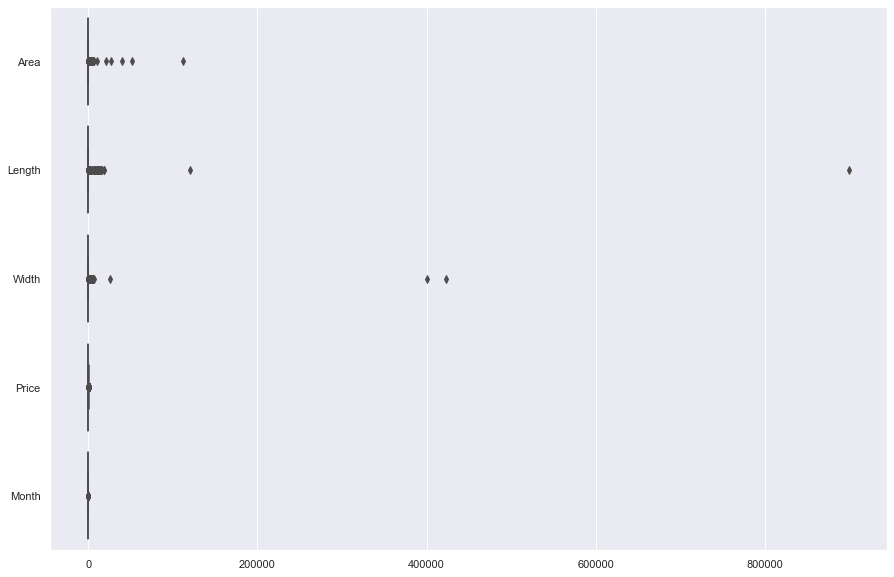

In [41]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Area`, `Length`, and `Width`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

# Outlier detection using boxplot

<AxesSubplot:>

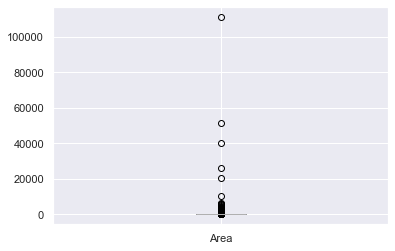

In [42]:
# plot the boxplot to see the outlier
df.boxplot('Area')

### ---------> OBSERVATION
> Base on this we can remove all the outlier that is greater than 20000 meter square. This is because those value is rare (about 5 data points). Thus, it would not affect our visualization and also it will not affect the model training process. We will replace the value with mean because we do not want the graph to be too much skew.

In [43]:
# replace all the value greater than 20000 with the mean of the column
df.loc[df['Area'] > 20000, 'Area'] = df['Area'].mean()

<AxesSubplot:>

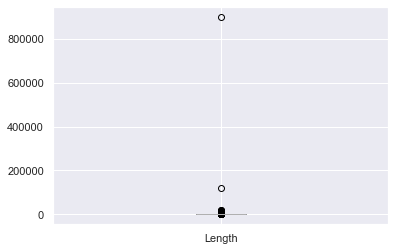

In [44]:
# plot the boxplot to see the outlier
df.boxplot('Length')

### ---------> OBSERVATION
> Similarly to the area, we will remove all the outlier that is greater than 200000 meter. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [45]:
# replace all the value greater than 200000 with the mean of the column
df.loc[df['Length'] > 200000, 'Length'] = df['Length'].mean()

<AxesSubplot:>

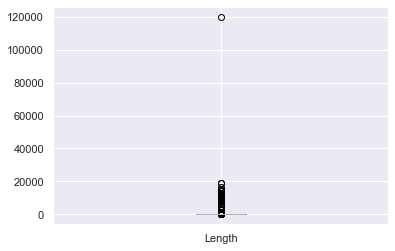

In [46]:
# plot the boxplot to see the outlier
df.boxplot('Length')

### ---------> OBSERVATION
> We will further remove all the outlier that is greater than 20000 meter. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [47]:
# replace all the value greater than 20000 with the mean of the column
df.loc[df['Length'] > 20000, 'Length'] = df['Length'].mean()

<AxesSubplot:>

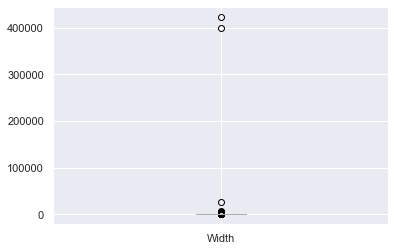

In [48]:
# plot the boxplot to see the outlier
df.boxplot('Width')

### ---------> OBSERVATION
> Similarly to the area, we will remove all the outlier that is greater than 100000 meter because there is still a great gap between two distintive outlier. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [49]:
# replace all the value greater than 100000 with the mean of the column
df.loc[df['Width'] > 100000, 'Width'] = df['Width'].mean()

<AxesSubplot:>

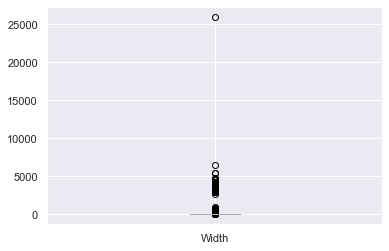

In [50]:
# plot the boxplot to see the outlier
df.boxplot('Width')

### ---------> OBSERVATION
> Similarly to the area, we will remove all the outlier that is greater than 10000 meter because there is still a great gap between two distintive outlier. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [51]:
# replace all the value greater than 10000 with the mean of the column
df.loc[df['Width'] > 10000, 'Width'] = df['Width'].mean()

### Interquartile Range

In [52]:
# calculate the q1 and q3 and then the iqr
q1_Price = df['Price'].quantile(.25)
q3_Price = df['Price'].quantile(.75)
iqr_Price = q3_Price - q1_Price

print("q1_Price:", q1_Price, "\n")
print("q3_Price:", q3_Price, "\n")
print("iqr_Price:", iqr_Price)

q1_Price: 73.33 

q3_Price: 110.29 

iqr_Price: 36.96000000000001


<a id="2.9.3"></a>
# Descriptive statistics for Variability

In [53]:
# look at the price mean
Price_mean = df['Price'].mean()
print("Price_mean:", Price_mean)
# look at the price median
Price_median = df['Price'].median()
print("Price_median:", Price_median)
# look at the price mode
Price_mode = df['Price'].mode().values[0]
print("Price_mode:", Price_mode)

Price_mean: 102.45500197250817
Price_median: 90.0
Price_mode: 100.0


(0.0, 550.0)

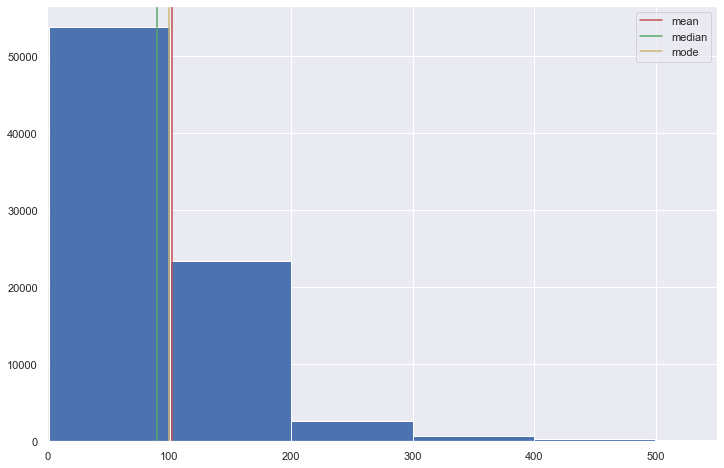

In [54]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Price'].hist()

plt.axvline(Price_mean, color='r', label='mean')
plt.axvline(Price_median, color='g', label='median')
plt.axvline(Price_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the right.

<a id="2.9.4"></a>
# Remove Impossible Values

### Area cannot be larger than Length * Width


The existing Area column might indicates the area of the whole land not the house's occupation. Therefore, the `Length * Width` is the max area that a property can get, so the values in `Area` column cannot exceed it.

In [55]:
def checkArea(df):
    #in case area is smaller or equal to the length * width -> it is correct -> return True otherwise -> return false
    if df['Length'] * df['Width'] >= df['Area']:
        return True
    return False

df['correctArea'] = df.apply(lambda r: checkArea(r), axis=1) # axis = 1 is for columns

In [56]:
#Determining the number of impossible values for Area
rslt_df = df[(df['correctArea'] == False)]
rslt_df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street,correctArea
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,False
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,YÊN HÒA,False
9,HÀ ĐÔNG,VĂN QUÁN,BYROAD,AVAILABLE,4,3,41.0,10.0,3.5,64.63,WEDNESDAY,8,19/5,False
15,LONG BIÊN,BỒ ĐỀ,BYROAD,AVAILABLE,5,4,52.0,12.0,4.2,93.27,WEDNESDAY,8,BỒ ĐỀ,False
17,HOÀN KIẾM,PHÚC TÂN,STREET_HOUSE,AVAILABLE,7,GREATER_THAN_10,165.0,18.5,5.0,103.03,WEDNESDAY,8,PHÚC TÂN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,THANH XUÂN,PHƯƠNG LIỆT,STREET_HOUSE,AVAILABLE,5,4,45.0,11.0,4.0,88.89,WEDNESDAY,2,NGUYỄN LÂN,False
82470,HOÀNG MAI,ĐỊNH CÔNG,BYROAD,AVAILABLE,5,6,45.0,11.0,4.0,96.67,TUESDAY,2,ĐỊNH CÔNG THƯỢNG,False
82471,ĐỐNG ĐA,NAM ĐỒNG,TOWNHOUSE,AVAILABLE,5,6,50.0,11.0,4.0,290.0,MONDAY,2,HÀO NAM,False
82472,THANH XUÂN,KHƯƠNG ĐÌNH,TOWNHOUSE,AVAILABLE,4,4,42.0,10.0,4.0,71.43,MONDAY,2,BÙI XƯƠNG TRẠCH,False


### ---------> OBSERVATION
****
> There are considerable difference between land's Area and the property's max Area -> drop and recalculate it.

### Drop and Recalculate Area

In [57]:
#Drop Area column
df.drop(columns=['correctArea', 'Area'], inplace = True)

#Recalculate it:
def calArea(df):
    return df['Length'] * df['Width']

df['Area'] = df.apply(lambda r: calArea(r), axis=1) # axis = 1 is for columns

### Length and Width cannot be lower than 2.4 meter square

In [58]:
rslt_df = df[(df['Width'] < 2.4) | (df['Length'] < 2.4)]
print(len(rslt_df))
rslt_df.head(3)

134


,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Length,Width,Price,Day_Of_Week,Month,Street,Area
1453,HAI BÀ TRƯNG,THANH NHÀN,BYROAD,AVAILABLE,2,1,6.5,2.0,66.67,TUESDAY,8,BẠCH MAI,13.0
3108,HOÀNG MAI,HOÀNG VĂN THỤ,STREET_HOUSE,OTHERS,5,3,2.0,1.0,161.67,MONDAY,8,HOÀNG MAI,2.0
4562,HAI BÀ TRƯNG,BẠCH MAI,STREET_HOUSE,AVAILABLE,5,2,1.0,1.0,90.04,MONDAY,8,BẠCH MAI,1.0


In [59]:
#since the data point of the impossible Area values is small so that set those values lower than 2.4 back to 2.4
df.loc[(df['Width'] < 2.4), 'Width'] = 2.4
df.loc[(df['Length'] < 2.4), 'Length'] = 2.4

### Area cannot be lower than 30 metersquare.
****
According to the Government, in order to be sold successfully the Area cannot lower than 30 metersquare if it is lower than 30 then it must have the legal document available otherwise, it cannot be sold

In [60]:
#Selecting the plots do not have or waiting legal document
legal_document = ['WAITING', 'OTHERS']

#query the plots have values Area is lower than 30 and do not have available legal documents
rslt_df = df[(df['Area'] < 30) & (df['Legal_documents'].isin(legal_document))]
print(len(rslt_df))
rslt_df

2345


,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Length,Width,Price,Day_Of_Week,Month,Street,Area
54,TÂY HỒ,BƯỞI,BYROAD,OTHERS,5,3,6.6,3.5,62.75,TUESDAY,8,LẠC LONG QUÂN,23.1
55,HAI BÀ TRƯNG,MINH KHAI,TOWNHOUSE,OTHERS,5,4,8.0,3.0,56.25,TUESDAY,8,MINH KHAI,24.0
65,HOÀNG MAI,HOÀNG VĂN THỤ,BYROAD,WAITING,4,3,8.0,3.6,72.22,TUESDAY,8,HOÀNG MAI,28.8
84,HOÀNG MAI,HOÀNG VĂN THỤ,BYROAD,WAITING,4,3,7.0,4.0,70.0,TUESDAY,8,HOÀNG MAI,28.0
126,THANH XUÂN,NHÂN CHÍNH,BYROAD,OTHERS,5,3,7.0,3.0,85.71,TUESDAY,8,QUAN NHÂN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82223,HOÀNG MAI,THỊNH LIỆT,BYROAD,OTHERS,5,3,9.0,3.0,81.21,TUESDAY,5,GIÁP NHỊ,27.0
82243,HOÀNG MAI,TRẦN PHÚ,BYROAD,OTHERS,5,2,6.0,3.2,60.0,FRIDAY,5,KHUYẾN LƯƠNG,19.2
82323,ĐỐNG ĐA,THỊNH QUANG,BYROAD,OTHERS,5,3,8.0,3.0,81.48,TUESDAY,5,THỊNH QUANG,24.0
82445,HAI BÀ TRƯNG,BẠCH MAI,TOWNHOUSE,OTHERS,5,3,6.0,3.2,83.33,FRIDAY,2,BẠCH MAI,19.2


In [61]:
#since the data point of the impossible Area values is small so that set those values lower than 30 back to 30
df.loc[((df['Area'] < 30) & (df['Legal_documents'].isin(legal_document))), 'Area'] = 30

<a id="2.10"></a>
# Create categorical price
we will group the price range together. This column will be our target column to predict the house price range base on others attribute such as location, house's property.

In [62]:
# check for all the static of the price column
df['Price'].describe()

count    81115.000000
mean       102.455002
std         63.263470
min          1.000000
25%         73.330000
50%         90.000000
75%        110.290000
max        998.000000
Name: Price, dtype: float64

<AxesSubplot:>

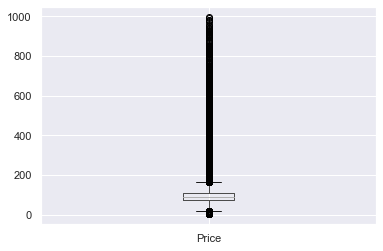

In [63]:
# plot out the price column to see outlier
df.boxplot('Price')

### Create categorical price by deriving New Features
We will adjust the range so that the frequency percentage of each price will be close to each other. This will be a method to make this class balance instead of just make the price range consecutive equally distributive.

In [64]:
# add the new column call Price_rance and input the value cooresponding to the price
df.loc[df['Price'].between(1, 61, inclusive=True), 'Price_range'] = '1-60'
df.loc[df['Price'].between(61, 71, inclusive=True), 'Price_range'] = '61-70'
df.loc[df['Price'].between(71, 81, inclusive=True), 'Price_range'] = '71-80'
df.loc[df['Price'].between(81, 91, inclusive=True), 'Price_range'] = '81-90'
df.loc[df['Price'].between(91, 101, inclusive=True), 'Price_range'] = '91-100'
df.loc[df['Price'].between(101, 201, inclusive=True), 'Price_range'] = '101-200'
df.loc[df['Price'].between(201, 301, inclusive=True), 'Price_range'] = '201-300'
df.loc[df['Price'].between(301, 1001, inclusive=True), 'Price_range'] = '301-1000'

In [65]:
def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Price_range']
    columns = ['Price_range'] + columns
    df = df[columns]
    return df 

reorder_columns(df)

,Price_range,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Length,Width,Price,Day_Of_Week,Month,Street,Area
0,81-90,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,44.0
1,101-200,THANH XUÂN,KIM GIANG,STREET_HOUSE,OTHERS,5,3,10.0,4.0,116.22,WEDNESDAY,8,KIM GIANG,40.0
2,61-70,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI,40.0
3,91-100,TÂY HỒ,THỤY KHUÊ,BYROAD,AVAILABLE,5,6,12.75,4.0,100.0,WEDNESDAY,8,VÕNG THỊ,51.0
4,81-90,THANH XUÂN,KIM GIANG,BYROAD,OTHERS,5,4,9.0,4.0,86.11,WEDNESDAY,8,KIM GIANG,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82473,71-80,HOÀNG MAI,YÊN SỞ,TOWNHOUSE,OTHERS,5,3,9.0,4.0,75.76,SUNDAY,2,TAM TRINH,36.0
82474,301-1000,BA ĐÌNH,PHÚC XÁ,BYROAD,AVAILABLE,3,3,8.0,4.0,375.0,SUNDAY,2,HỒNG HÀ,32.0
82475,71-80,HAI BÀ TRƯNG,MINH KHAI,TOWNHOUSE,AVAILABLE,5,3,8.0,4.0,76.56,SATURDAY,2,MINH KHAI,32.0
82476,81-90,NAM TỪ LIÊM,MỄ TRÌ,STREET_HOUSE,OTHERS,5,6,10.0,4.0,84.21,SATURDAY,2,MỄ TRÌ THƯỢNG,40.0


<a id="2.11"></a>
# Save the Intermediate data that has been transformed 

In [66]:
# set the path of the cleaned data to data and dash
interim_data_path = os.path.join(os.path.pardir,'data','interim')
write_interim_path = os.path.join(interim_data_path, 'cleaned_data.csv')

dash_data_path = os.path.join(os.path.pardir,'web_app','dash')
write_dash_path = os.path.join(dash_data_path, 'cleaned_data.csv')

streamlit_data_path = os.path.join(os.path.pardir,'web_app','streamlit','data')
write_streamlit_path = os.path.join(streamlit_data_path, 'cleaned_data.csv')



# To write the data from the data frame into a file, use the to_csv function.
df.to_csv(write_interim_path, index=False)
df.to_csv(write_dash_path, index=False)
df.to_csv(write_streamlit_path, index=False)
df.to_csv()

# df.to_csv('Dash/cleaned_data.csv', index=False)
print("Cleaned data was successfully saved!")

Cleaned data was successfully saved!


<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Data exploration (EDA)</strong></h1>


## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings

6. Additional Reading Resources


***
Before we dive into finding relations between independent variables and our dependent variable(`Price_range`), let us create some assumptions about how the connections may turn out among features.

**Assumptions:**

From the customer's point of view, they desire to buy the best house's price on value. Hence, time and location for purchasing a property are some of the most considerations of the purchasers. There are some assumptions made:

**Time Assumptions:**
> - More Houses are sold on the weekday than on the weekend.
> - The house `Price_range` on the weekend is lower than on weekdays.
> - More Houses are sold at the end of the year. (December)
> - The house has the highest `Price_range` at the end of the year (In December).
> - The plots have higher `Price_range` have :
> > - Available Legal Documents
> > - The Number of floors higher than 2.
> > - The Number of bedrooms higher than 2.
> > - The Area is higher than 50 metersquare
> > - The house type is Street House or Villa.
> > - Locate in the center of Hanoi or urban city.

**Location Assumptions:**
> - The `Price_range` in Urban such as Ba Dinh, Hoan Kiem, Hai Ba Trung District is higher than in Suburban such as Gia Lam, Phu Yen.

Now, let's see how the features are related by creating some visualizations.
****


<a id="3.1"></a>
# Frequency of each corresponding Target variable type

In [67]:
# get all the house type and the frequency of each corresponding type
House_type_counts = {}
# do a forloop to collect the frequency of each house type
for p in df['Price_range']:
    if p not in House_type_counts:
        House_type_counts[p] = 1
    else:
        House_type_counts[p] += 1
# print the result
House_type_counts

{'81-90': 12378,
 '101-200': 23384,
 '61-70': 8149,
 '91-100': 11780,
 '1-60': 9583,
 '71-80': 11955,
 '201-300': 2580,
 '301-1000': 1306}

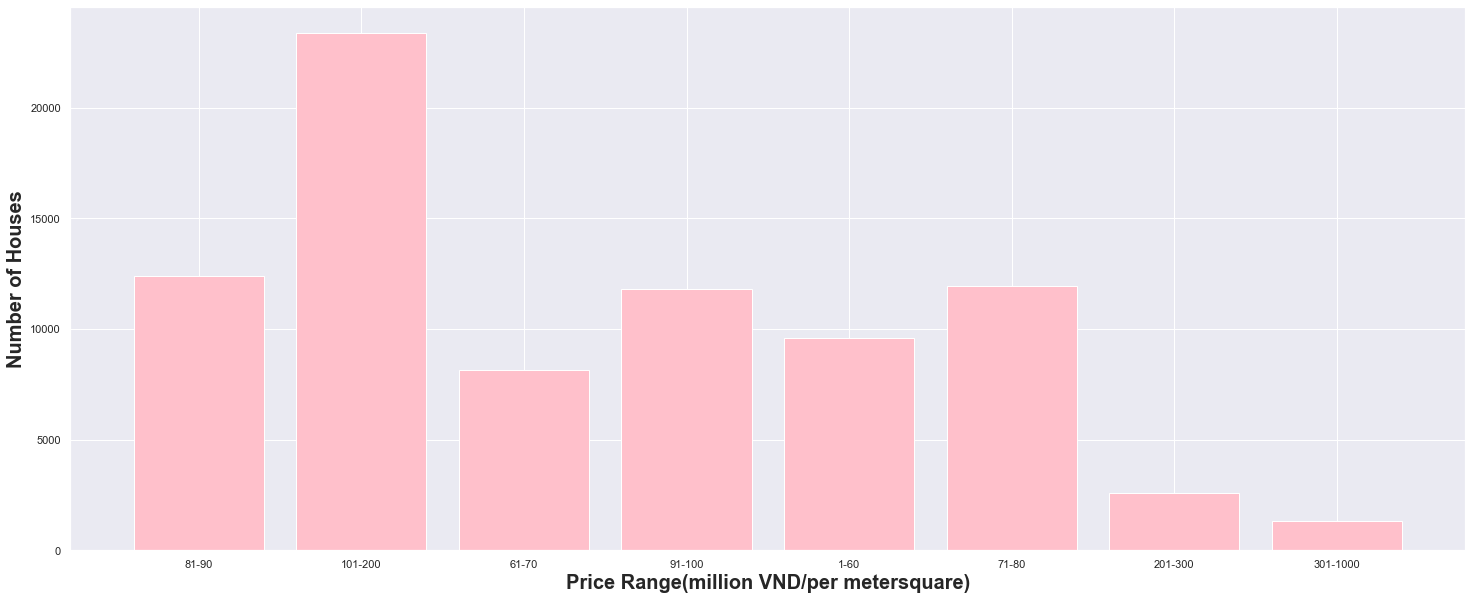

In [68]:
# plot the bar chart
plt.figure(figsize=(25, 10))

x_range = range(len(House_type_counts))

plt.bar(x_range, list(House_type_counts.values()), align='center', color='pink')
plt.xticks(x_range, list(House_type_counts.keys()))

plt.xlabel("Price Range(million VND/per metersquare)", fontsize = 20, fontweight = 'bold' )
plt.ylabel("Number of Houses", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

plt.show()

### ---------> EXPLANATION
> We choose to present this bar plot becase we are interesting in the price range with respect to the number of house. It is suitable because bar plot best present the relationship between categorical value with respect ot the numerical value.

### ---------> OBSERVATION
> Overall the price range 101 - 200 million VND accounts for more than a quater of the dataset. The range 301-1000 million, and 201-300 million only accounts Unconsiderably with just lower than 5 percent. Most of the price is fall in the 1 to 100 million.

## Overall look
First of all, determining the price range distribution in order to determine which factors have affect the price
***
### Price range distribution

### Price of each house type

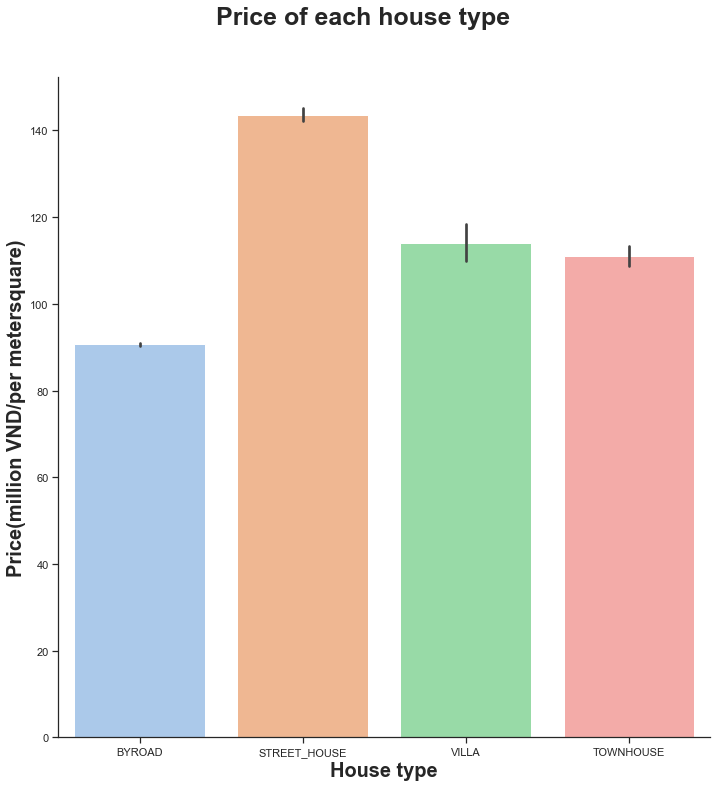

In [69]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color

plot = sns.catplot(data=df, kind="bar", x="House_type", y="Price", height = 10)

plot.fig.suptitle("Price of each house type", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("House type", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Price(million VND/per metersquare)", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> EXPLANATION
> We choose to present this bar plot because we are interesting in the House type with respect to the house price. It is suitable because bar plot best present the relationship between categorical value with respect ot the numerical value.
### ---------> OBSERVATION
> According to the plots, the price of `STREET_HOUSE` has the highest price, and the `BYROAD` has the lowest price.

## Function for visualization

In [70]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

## New "Region" Column
***
+ The target is to find the location for the best optimised region. 
+ Hence, at first the dataset is separted into `Urban` or `Suburbans`, then compare them.

In [71]:
def region(district):
    urban = ['CẦU GIÂY', 'THANH XUÂN', 'HAI BÀ TRƯNG', 'TÂY HỒ', 'ĐỐNG ĐA', 'HOÀNG MAI', 'HOÀN KIẾM',  'BA ĐÌNH']
    location = 'SUBURBAN'
    for i in range (0, 8):
        if(district == urban[i]): location = 'URBAN'
    return location

df['Region'] = df['District'].apply(region)

<a id="3.2"></a>
# Determine Location (urban and suburban) influence the price
### Distribution (Proportion) of Urban and Suburban

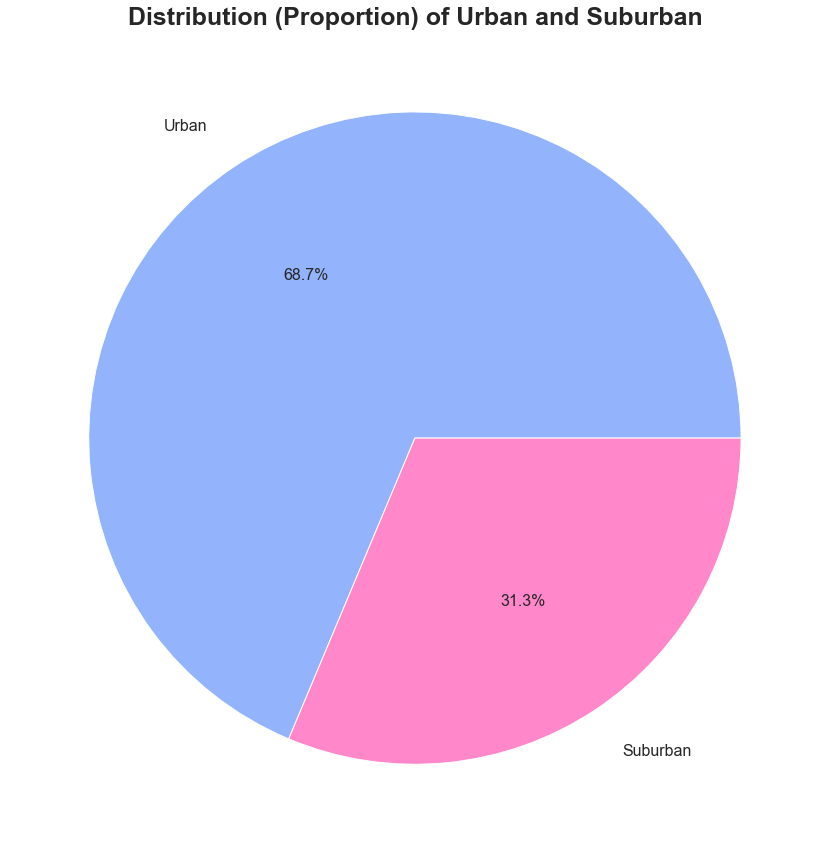

In [72]:
# Pie chart Distribution (Proportion) of Urban and Suburban
labels = ['Urban', 'Suburban']
#colors
colors = ['#94B3FD', '#FF87CA']
ax = plt.pie(df['Region'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Distribution (Proportion) of Urban and Suburban', fontsize=25, fontweight = 'bold')

plt.show()

### ---------> EXPLANATION
> we choose this pie chart to best present the categorical value which is Location.
### ----------> OBSERVATION
> Most of the plots are in urban with the percentage is over 68.7 percent, while the Suburban just over 31.3 percent.

# Housing Price in Urban and Suburban

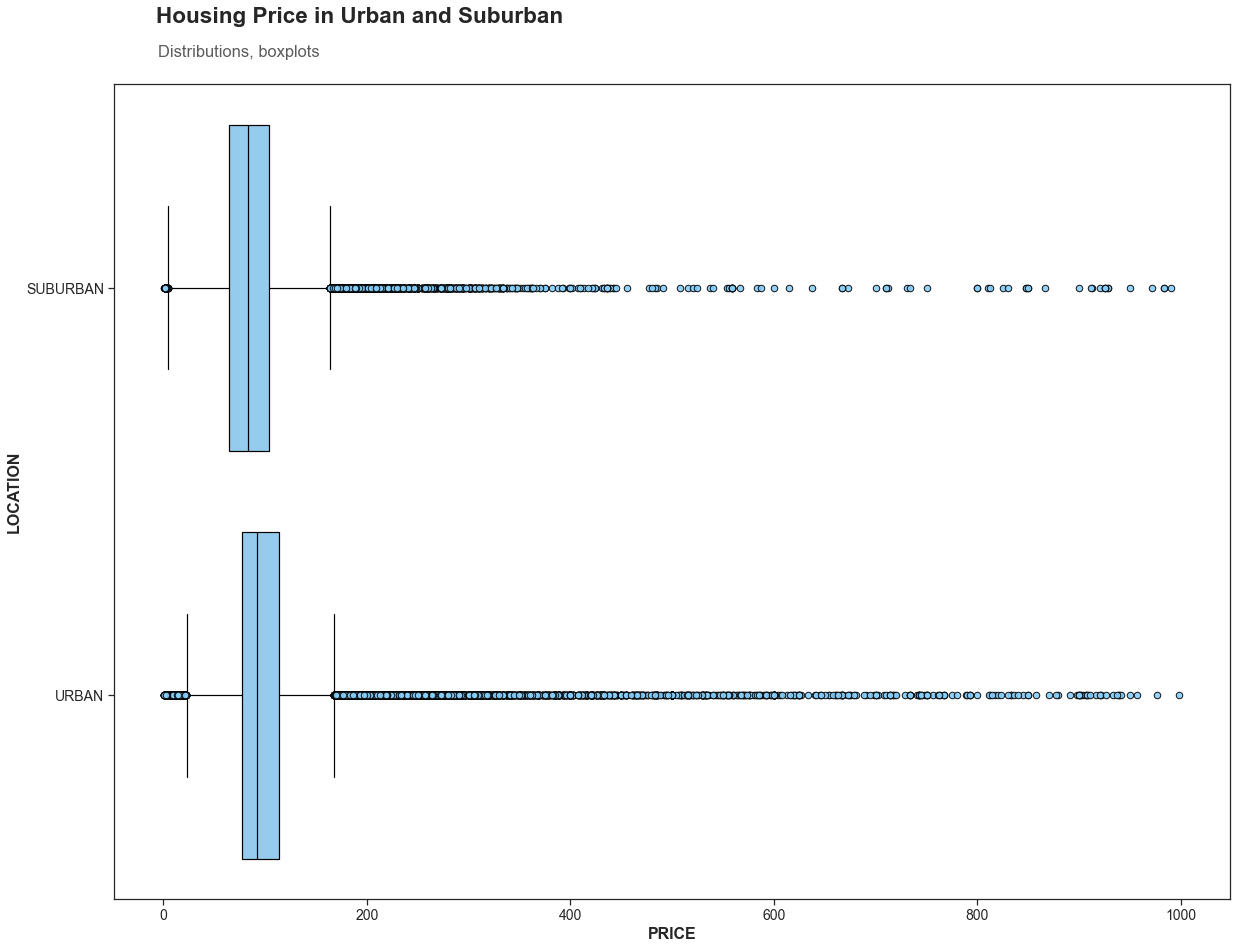

In [73]:
plot_box(df, x = "Price", y = "Region", xlabel = 'PRICE', ylabel = "LOCATION", title = "Housing Price in Urban and Suburban",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

### ---------> EXPLANATION
> As the boxplot is best present the categorical value with respect to the numerical value. Hence, it is best present the Location with respect to the price.
### ----------> OBSERVATION
> The Urban price is slightly higher than Suburban

### Bivariate Analysis

In [74]:
df.describe()

,Length,Width,Price,Month,Area
count,81115.000000,81115.000000,81115.000000,81115.000000,8.111500e+04
mean,17.375695,8.434866,102.455002,6.720360,2.169027e+04
std,258.395600,111.366138,63.263470,0.640843,9.966408e+05
min,2.400000,2.400000,1.000000,2.000000,1.000000e+00
25%,9.000000,4.000000,73.330000,6.000000,3.600000e+01
50%,10.000000,4.000000,90.000000,7.000000,4.000000e+01
75%,12.000000,4.300000,110.290000,7.000000,5.040000e+01
max,19000.000000,6500.000000,998.000000,8.000000,1.072500e+08


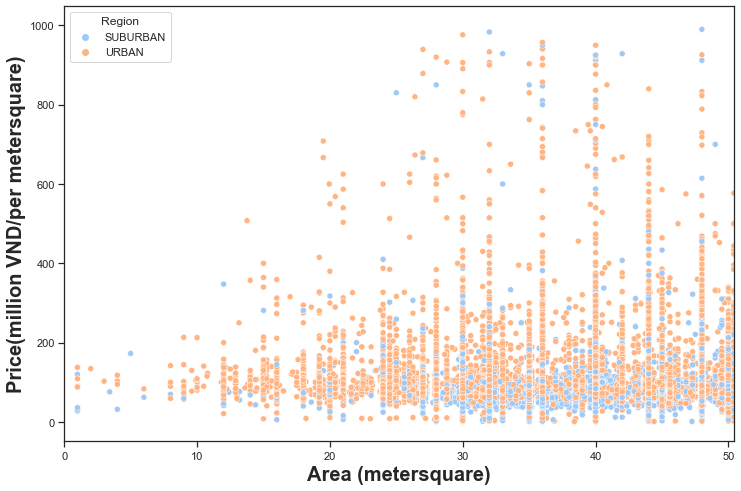

In [75]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x = "Area", y = "Price", hue='Region', data=df)

plt.xlim(0,5.040000e+01)
# plt.ylim(0,10000)

plt.xlabel("Area (metersquare)", fontsize = 20, fontweight = 'bold' )
plt.ylabel("Price(million VND/per metersquare)", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> EXPLANATION
> We choose to present this scatter plot because it is best present the pair of numerical value which is the Area, and the Price. Hence, this plot will best describle the density of Area with respect to the Price.
### ---------> OBSERVATION
> There are many resonable extreme expensive value for houses and we decided to keep them. To see the overall trend, we limit the x axis limit to 5.040000e+01 meter squared 

> As the area increases, the price also increases.

# Date visualization

### Number of houses for Day Of Week by Types

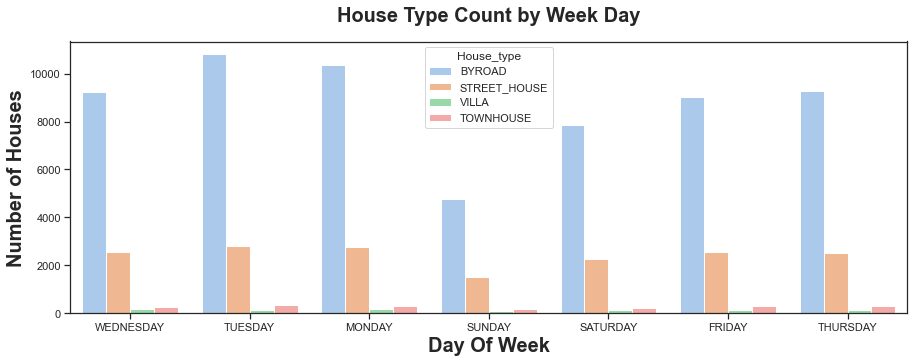

In [76]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Day_Of_Week', hue='House_type', data=df)

# set the ticks, labels and title
plt.title('House Type Count by Week Day', size=15, y=1.05, fontsize = 20, fontweight = 'bold')
plt.xlabel("Day Of Week", fontsize = 20, fontweight = 'bold')
plt.ylabel("Number of Houses", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

# show plot
plt.show()

### ---------> EXPLANATION
> We choose to present this bar plot becase we are interesting in the Day of week with respect to the number of house. It is suitable because bar plot best present the relationship between categorical value with respect ot the numerical value.
### ---------> OBSERVATION
> <b> The hypothesis "Are house sold more in the week day than in the weekend?" is correct. </b> The most houses were recorded on Tuesday while the lowest price in Sunday, and the BYROAD house is the most popular house type.

### House Price by Week

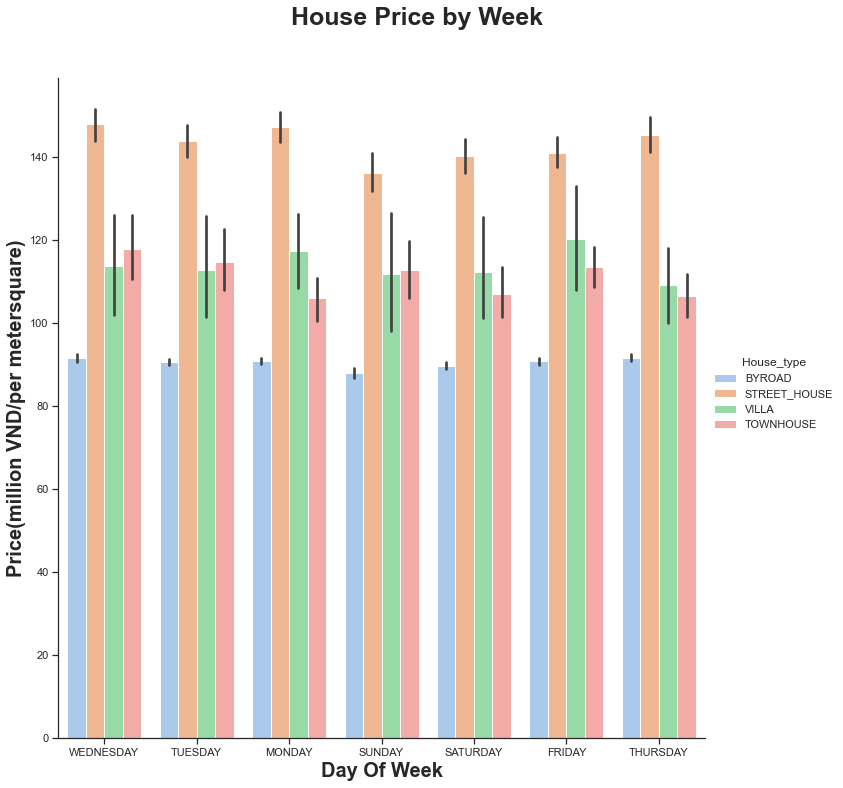

In [77]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color

plot = sns.catplot(data=df, kind="bar", x="Day_Of_Week", y="Price",  hue="House_type", height = 10)

plot.fig.suptitle("House Price by Week", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Day Of Week", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Price(million VND/per metersquare)", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> EXPLANATION
> We choose to present this bar plot becase we are interesting in the day of week with respect to the price. It is suitable because bar plot best present the relationship between categorical value with respect ot the numerical value.
### ---------> OBSERVATION
> <b> The hypothesis "Are house sold more in the week day than in the weekend?" is correct. </b> The most houses were recorded on Tuesday while the lowest price in Sunday, and the BYROAD house is the most popular house type.

### Number of houses for Month by Types

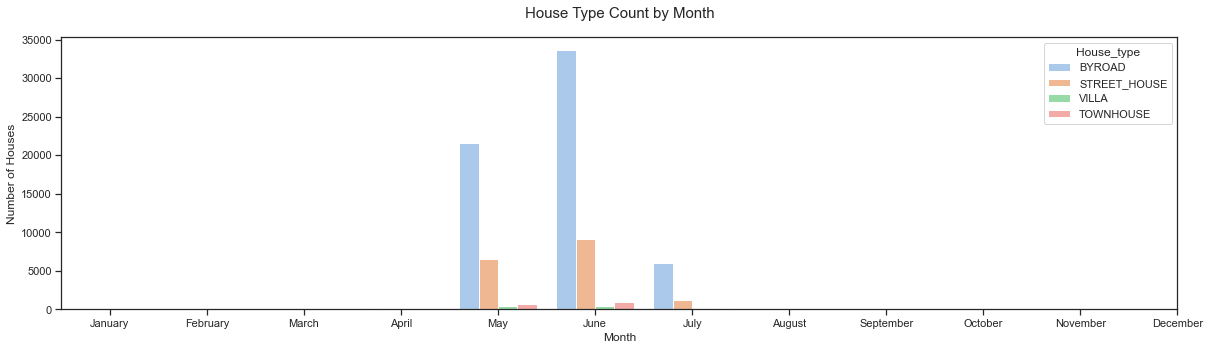

In [78]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Month', hue='House_type', data=df)

# set itle, labels and ticks
plt.title('House Type Count by Month', size=15, y=1.05)
plt.ylabel("Number of Houses")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])

#show plot
plt.show()

### ---------> EXPLANATION
> We choose to present this bar plot becase we are interesting in the month with respect to the number of house. It is suitable because bar plot best present the relationship between categorical value with respect ot the numerical value.
### ---------> OBSERVATION
> <b> The hypothesis "Are houses sold more in the end of the year?" is incorrect. </b> Surprisingly, significantly higher houses were recorded from May to July, and the BYROAD house is the most popular house type.

### House Price by Month

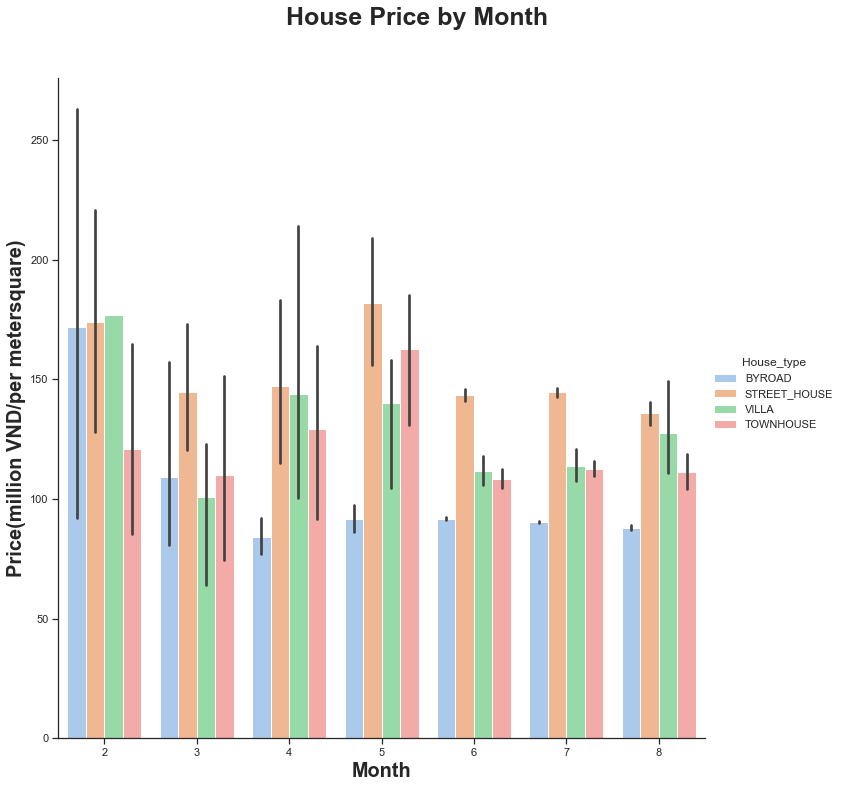

In [79]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color

plot = sns.catplot(data=df, kind="bar", x="Month", y="Price",  hue="House_type", height = 10)

plot.fig.suptitle("House Price by Month", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Month", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Price(million VND/per metersquare)", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> EXPLANATION
> We choose to present this bar plot becase we are interesting in the month with respect to the price. It is suitable because bar plot best present the relationship between categorical value with respect ot the numerical value.
### ---------> OBSERVATION
> - <b> For Month </b>: The month which has the highest price is Febuary with the highest price is byroad reached over 240 million VND. The lowest price is in April, with the price is lower than 100 million.
> - <b> For House type </b>: the lowest price is lower than 100 million is belonged to Byroad houses, it also has the highest price which reached over 240 million VND.
****
-----> <b> Summary </b>:
> - <b> The hypothesis "Is the houses price is higher than in the end of the year?".</b> The house price has highest price in the Febuary, and Byroad has the Highest Price in Febuary

## Time factor Summary:
> - More Houses are sold in the week day than in the weekend.
> - The house price in the weekend is lower than in the week day.
> - Houses are sold more in the middle of the year (from May to July ) tha the end of the year
> - The Byraoad has the price vary from highest (reached over 240 million VND) the lowest (lower than 100 million VND)

<a id="3.3"></a>
# Legal document factor
### Proportion Legal documents


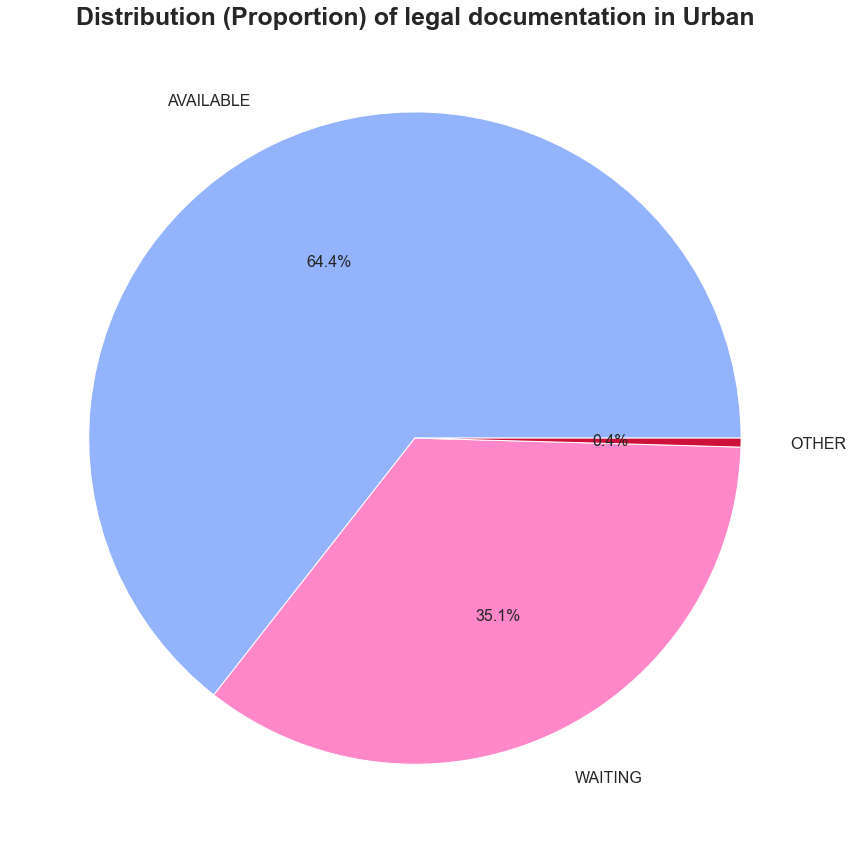

In [80]:
# Pie chart
labels = ['AVAILABLE', 'WAITING', 'OTHER']
#colors
colors = ['#94B3FD', '#FF87CA', '#CD113B']
ax = plt.pie(df['Legal_documents'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Distribution (Proportion) of legal documentation in Urban', fontsize=25, fontweight = 'bold')

plt.show()

### ---------> EXPLANATION
> We choose to present this pie chart so that it best present the Legal document column which is categorical value.
### ----------> OBSERVATION
<hr>

- The percentage of plots having the available legal document is over 64 percent and it is tripple the other and there is no waiting legal document.

### The Price of each plot in each type of legal documents with different house type


Text(0.5, 1.0, 'The Price of each plot in each type of legal documents with different house type')

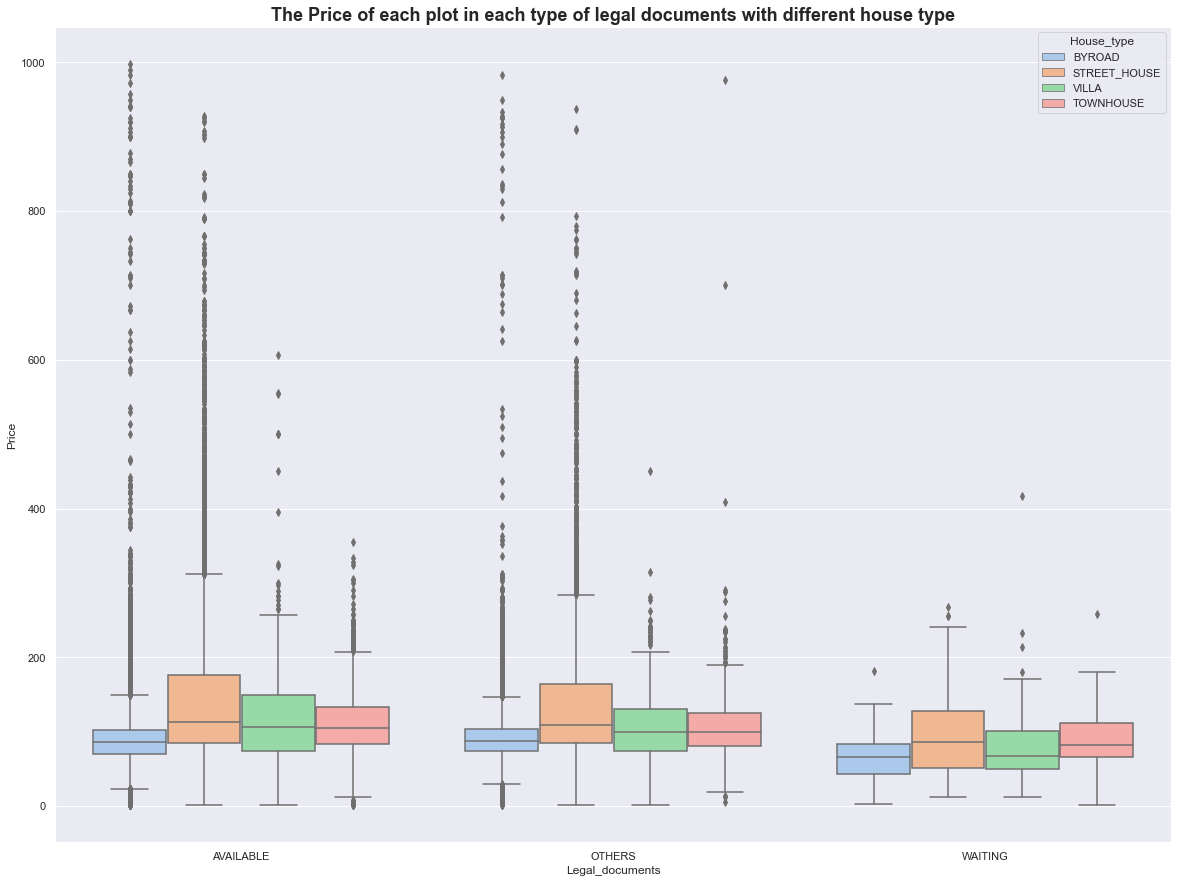

In [81]:
sns.set_style('darkgrid')
ax = sns.boxplot(x="Legal_documents", y="Price", hue="House_type", data=df);
ax.set_title('The Price of each plot in each type of legal documents with different house type',  fontsize = 18, fontweight = 'bold')

### ---------> EXPLANATION
> We choose to use boxplot to best present the categorical value with respect to the numerical value which is Legal document with respect to the price.
### ----------> OBSERVATION:
<hr>

- For the Legal Document:
> - The available legal document has the higest price which reached over 1 billion VND per metersquare (1000 million).
> - The available legal document is also the most common factor.

------> <b> The Legal document has a considerable influence on the price. </b>

- For the house type: the Byroad has the highest and lowest price with the price vary from around 50 to over 1000 million VND per metersquare.

****
-----> <b> Summary </b>:
> - The plots have higher price have Available Legal Documents.

****
### The Price of each plot in each type of legal documents with different number of floor

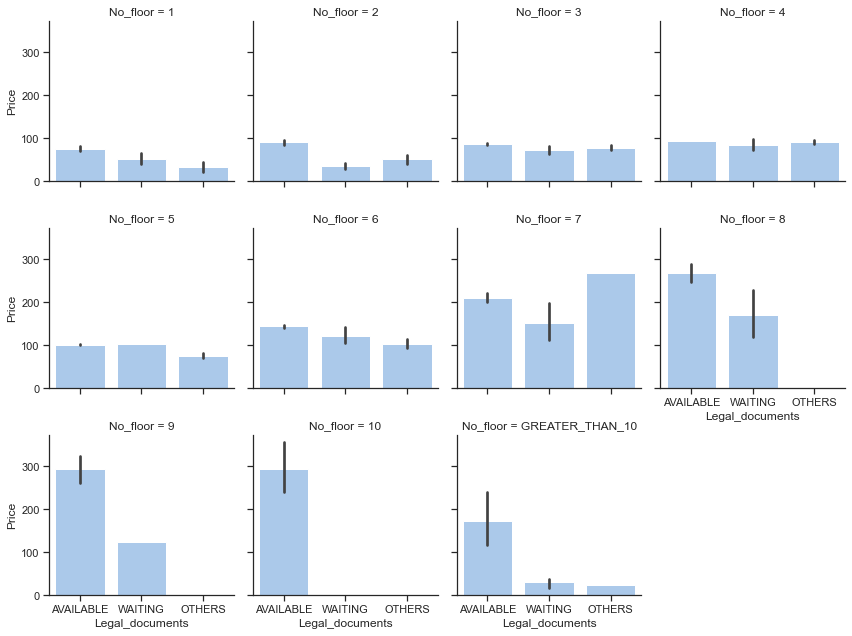

In [82]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color

g=sns.FacetGrid(df,col="No_floor", col_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "GREATER_THAN_10"], col_wrap=4)
# g = sns.FacetGrid(df, col="No_floor",  hue="No_bedroom")

g.map(sns.barplot,"Legal_documents","Price")

### ---------> EXPLANATION
> We choose to present by bar plot because it is best present the categorical value with respect to the numerical vlaue. This will be the best plot to present the relationship between legal documents with respect to the average price.
### ----------> OBSERVATION:
<hr>

- For the Legal Document, the available legal document has the higest price, the waiting one is still higher than the other group. In the available group, the low price is around 100 while the lowest price in all the group is the waiting with the price lower than 50 million VND per metersquare ------> The Legal document has a considerable influence on the price.

- For the number of floor: the number of floor that higher than 6 the higher price than those lower than 6 with the price vary from 120 to 200 million VND per metersquare. The number of floor 10 has the highest number of price.

****
-----> <b> Summary </b>: <b> Third assumption is correct </b> the Byroad house have highest price, 10 bedrooms, 10 floors and the available legal document.

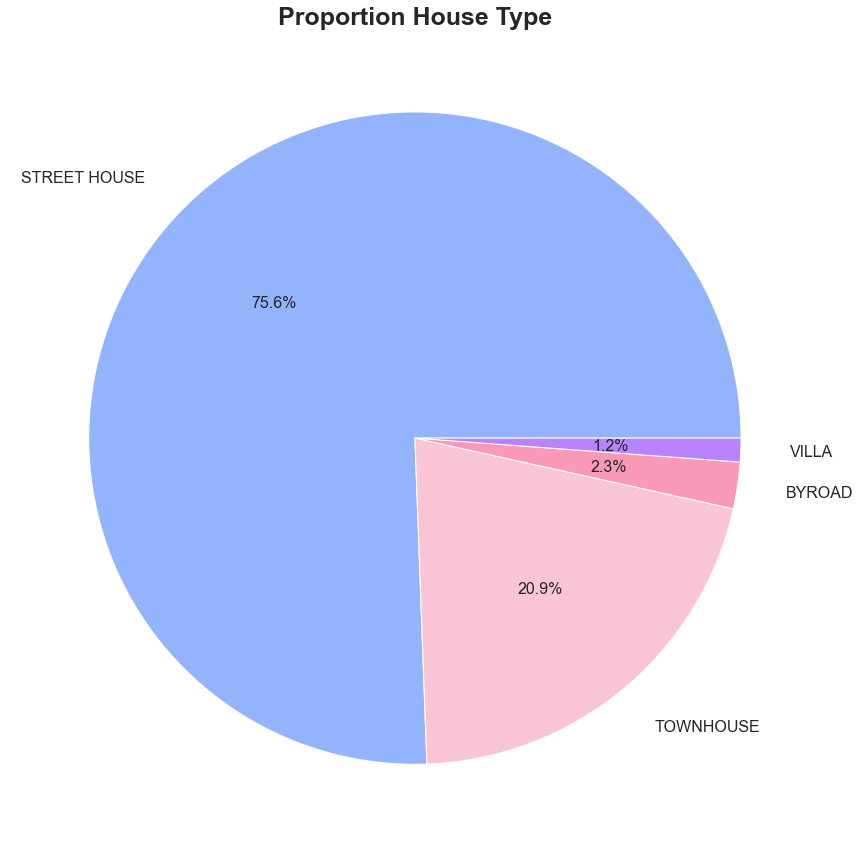

In [83]:
# Pie chart
labels = ['STREET HOUSE', 'TOWNHOUSE', 'BYROAD', 'VILLA']
#colors
colors = ['#94B3FD', '#F9C5D5', '#F999B7', '#B983FF']
ax = plt.pie(df['House_type'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion House Type', fontsize=25, fontweight = 'bold')



plt.show()

### ---------> EXPLANATION
> We choose to present this pie chart which is best present the categorical value. In this case we can see the proportional of each type of house in this dataset.
### ----------> OBSERVATION

> - The highest proportion house type is the Street_house which is more than 75 percent, the town house is the second common option. The byroad and the villa is the least common option with just over 24 percent in total.
> - The Street House has a low price that is understandable that it is the most common option, while the Byroad type have the highest price but is the less common options.

(0.0, 10000.0)

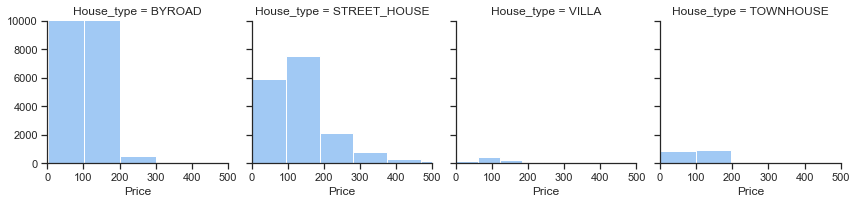

In [84]:
g=sns.FacetGrid(df,col="House_type")
g.map(plt.hist,"Price")

plt.xlim(0,500)
plt.ylim(0,10000)

### ---------> EXPLANATION
> We choose to present this histogram so that we can see how each type of house will have certain price with respect to the frequency of it in the dataset. As the histogram is best present the numerical data value.
### ---------> OBSERVATION

> We have called the plt.hist function to plot a histogram for the count and total price for the different types of house types in Hanoi.

> It is clear that the STREET house type has the highest price. It has the maximum interaction in the form of all types. The histogram shows that the price between 0 and 300 has the largest area, implying highest price.

> All houses have more likely to have prices in the range of 50 to 300.

> The houses with a STREET house type are more popular than those with VILLA, BYROAD, or TOWNHOUSE types.

### Multiple variables to make a Relational Scatterplot.

+ Adding a legend to show what the colors stand for
+ We have added "alpha=0.7" to reduce the opacity of the points in the scatterplot.
+ It is 1 by default. Making it closer to 0 makes it more transparent.

(0.0, 5000.0)

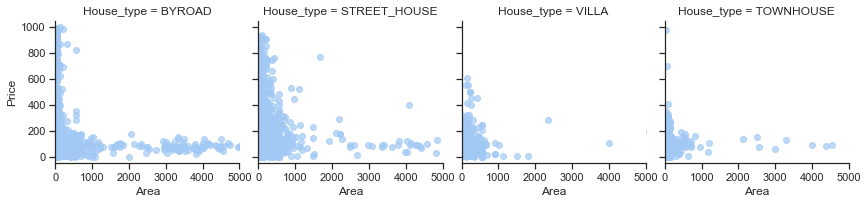

In [85]:
g=sns.FacetGrid(df, col="House_type")
g.map(plt.scatter,"Area", "Price", alpha=0.7)

g.add_legend()

plt.xlim(0,5000)
# plt.ylim(0,10000)

### ---------> EXPLANATION
> We choose to present this scatter plot to present the relationship between the Area compare to the Price with respect to each type of house. Since this plot is best present the numerical value compare with a numerical value.
### ---------> OBSERVATION
> In the range of 0 to 5000 meter square, the STREET house type has the highest price and the BYROAD has larger area than others

### ----------> SUMMARY
<hr>

> The hypothesis "Does the plots have higher price have Available Legal Documents, the number of floors higher than 2, the number of bedrooms higher than 2, the Area is higher than 50 metersquare, the house type is Street House or Villa, Locate in the center of Hanoi or urban city?" 

> - The highest price is in Feburary, and its price is twice of the September, whose price is the lowest
> - The plot have high price have:
> >  - Available Legal Documents
> >  - Number of room is 10 rooms
> >  - Number of floor is 10 floors.
> >  - The house type is Street House or Villa.

### Bar plot

*We simply pass in an ordered list to the corresponding parameter, for eg, row_order, hue_order, etc.* <br>
By default, the variables are ordered in ascending order if they are numbers, and in the order of appearance otherwise.

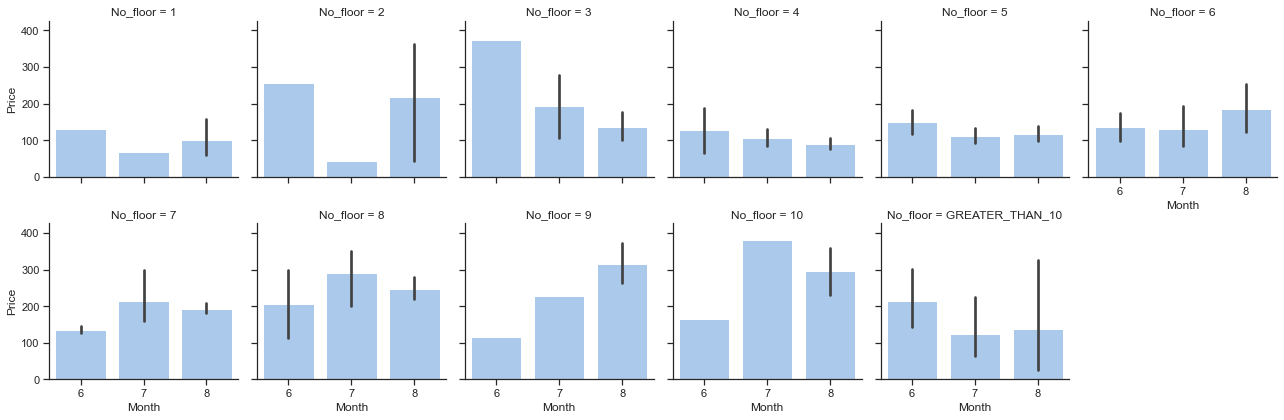

In [86]:
g=sns.FacetGrid(df,col="No_floor", col_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "GREATER_THAN_10"], col_wrap=6)

g.map(sns.barplot,"Month","Price")

### ---------> EXPLANATION
> We choose to present this bar plot because it is best present the month with respect to the price. As mention early, bar plot can present the categorical value compare with the numerical value well.
### ---------> OBSERVATION
> Hoan Kiem district has the highest house price in the year 2020.

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. Feature Engineering</strong></h1>

<a id="4.1"></a>
# Drop Unrealated columns to the target 

Since the price was calculated base each meter square of the house not the total area, the Width, Length, and Area might not be the meaningful attribute to include into the model. Therefore, we will drop them

In [87]:
df.drop(['Width', 'Length', 'Area'], axis = 1, inplace = True)

In [88]:
correlation_matrix = df.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y])
                    for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

print("\n\nThe shape of the data BEFORE DROP is (row, column):", str(df.shape))

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

df.drop(columns=to_drop, axis=1,inplace=True)
print("The shape of the data AFTER DROP is (row, column):", str(df.shape))

Total Number of correlated pairs:  0
[]


The shape of the data BEFORE DROP is (row, column): (81115, 12)
The shape of the data AFTER DROP is (row, column): (81115, 12)


<a id="4.2"></a>
# Class Imbalances
Class separability! When is it appropriate to use rebalancing methods?

In [89]:
df['Price_range'].value_counts()

101-200     23384
81-90       12378
71-80       11955
91-100      11780
1-60         9583
61-70        8149
201-300      2580
301-1000     1306
Name: Price_range, dtype: int64

In [90]:
df['Price_range'].value_counts(normalize=True, dropna=False)

101-200     0.288282
81-90       0.152598
71-80       0.147383
91-100      0.145226
1-60        0.118141
61-70       0.100462
201-300     0.031807
301-1000    0.016101
Name: Price_range, dtype: float64

<a id="4.3"></a>
# Encoding

In [91]:
df.head(3)

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Price,Day_Of_Week,Month,Street,Price_range,Region
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,81-90,SUBURBAN
1,THANH XUÂN,KIM GIANG,STREET_HOUSE,OTHERS,5,3,116.22,WEDNESDAY,8,KIM GIANG,101-200,URBAN
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,65.0,WEDNESDAY,8,MINH KHAI,61-70,URBAN


In [92]:
# Region
df['Region'] = np.where(df.Region == 'URBAN', 1, 0)

In [93]:
# create a function to encoding the categorical value
def to_one_hot_encoder(df, column_name):
    # we will set the drop to be if_binary so that we can delete an encoded column if that column have a binary cateogircal value such as true/false, yes/no
    ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='if_binary')
    
    # get the column and encoding it into dataframe
    data = ohe.fit_transform(df[[column_name]])
    
    # create the dataframe base on data and the value will be integer
    encode_df = pd.DataFrame(data=data, columns=ohe.get_feature_names([column_name]), dtype=int)
    
    # add the encoding dataframe back to the dataframe
    df.reset_index(inplace=True, drop=True)
    df = pd.concat([df, encode_df], axis=1)
    
    # remove the original column
    df.drop([column_name], inplace=True, axis=1)

    return df

In [94]:
# create a function to encoding the value
def to_label_encoder(df, column, category):
    oe = OrdinalEncoder(categories=[category])
    # get the column and encoding it into dataframe
    data = oe.fit_transform(df[[column]])
    # create the dataframe base on data and the value will be integer
    encode_df = pd.DataFrame(data=data, columns=[column], dtype=int)
    # add the encoding dataframe back to the dataframe
    df[column] = encode_df.values

In [95]:
df.drop('Street', 1, inplace=True)
df.drop('Price', 1, inplace=True)

In [96]:
df = to_one_hot_encoder(df, 'District')
df = to_one_hot_encoder(df, 'Ward')
df = to_one_hot_encoder(df, 'House_type')
df = to_one_hot_encoder(df, 'Legal_documents')
df = to_one_hot_encoder(df, 'Day_Of_Week')

In [97]:
lst_No_bedroom = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'GREATER_THAN_10']

to_label_encoder(df, 'No_bedroom', lst_No_bedroom)
to_label_encoder(df, 'No_floor', lst_No_bedroom)

lst_Price_range = ['1-60', '61-70', '71-80', '81-90', '91-100', '101-200', '201-300', '301-1000']

to_label_encoder(df, 'Price_range', lst_Price_range)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Columns: 354 entries, No_floor to Day_Of_Week_WEDNESDAY
dtypes: Int32(1), int32(353)
memory usage: 109.6 MB


In [99]:
reorder_columns(df)

,Price_range,No_floor,No_bedroom,Month,Region,District_BA ĐÌNH,District_BẮC TỪ LIÊM,District_CẦU GIẤY,District_HAI BÀ TRƯNG,District_HOÀN KIẾM,District_HOÀNG MAI,District_HUYỆN BA VÌ,District_HUYỆN CHƯƠNG MỸ,District_HUYỆN GIA LÂM,District_HUYỆN HOÀI ĐỨC,District_HUYỆN MÊ LINH,District_HUYỆN MỸ ĐỨC,District_HUYỆN PHÚ XUYÊN,District_HUYỆN PHÚC THỌ,District_HUYỆN QUỐC OAI,District_HUYỆN SÓC SƠN,District_HUYỆN THANH OAI,District_HUYỆN THANH TRÌ,District_HUYỆN THƯỜNG TÍN,District_HUYỆN THẠCH THẤT,District_HUYỆN ĐAN PHƯỢNG,District_HUYỆN ĐÔNG ANH,District_HÀ ĐÔNG,District_LONG BIÊN,District_NAM TỪ LIÊM,District_THANH XUÂN,District_THỊ XÃ SƠN TÂY,District_TÂY HỒ,District_ĐỐNG ĐA,Ward_AN KHÁNH,Ward_AN THƯỢNG,Ward_BIÊN GIANG,Ward_BÁCH KHOA,Ward_BÁT TRÀNG,Ward_BÌNH PHÚ,Ward_BÌNH YÊN,Ward_BÍCH HÒA,Ward_BÙI THỊ XUÂN,Ward_BƯỞI,Ward_BẠCH MAI,Ward_BẠCH ĐẰNG,Ward_BẮC HỒNG,Ward_BỒ ĐỀ,Ward_CHƯƠNG DƯƠNG,Ward_CÁT LINH,Ward_CẦU DIỄN,Ward_CẦU DỀN,Ward_CỐNG VỊ,Ward_CỔ BI,Ward_CỔ NHUẾ 1,Ward_CỔ NHUẾ 2,Ward_CỔ ĐÔNG,Ward_CỬA NAM,Ward_CỬA ĐÔNG,Ward_CỰ KHÊ,Ward_CỰ KHỐI,Ward_DI TRẠCH,Ward_DUYÊN HÀ,Ward_DUYÊN THÁI,Ward_DƯƠNG LIỄU,Ward_DƯƠNG NỘI,Ward_DƯƠNG QUANG,Ward_DƯƠNG XÁ,Ward_DỊCH VỌNG,Ward_DỊCH VỌNG HẬU,Ward_DỤC TÚ,Ward_GIA THỤY,Ward_GIANG BIÊN,Ward_GIÁP BÁT,Ward_GIẢNG VÕ,Ward_HOÀNG LIỆT,Ward_HOÀNG VĂN THỤ,Ward_HÀ CẦU,Ward_HÀ HỒI,Ward_HÀNG BUỒM,Ward_HÀNG BÀI,Ward_HÀNG BÔNG,Ward_HÀNG BẠC,Ward_HÀNG BỒ,Ward_HÀNG BỘT,Ward_HÀNG GAI,Ward_HÀNG MÃ,Ward_HÀNG TRỐNG,Ward_HÀNG ĐÀO,Ward_HÒA THẠCH,Ward_HƯƠNG NGẢI,Ward_HẠ ĐÌNH,Ward_HẢI BỐI,Ward_HỢP THANH,Ward_HỮU HOÀ,Ward_KHÁNH HÀ,Ward_KHÂM THIÊN,Ward_KHƯƠNG MAI,Ward_KHƯƠNG THƯỢNG,Ward_KHƯƠNG TRUNG,...,Ward_TRUNG SƠN TRẦM,Ward_TRUNG TỰ,Ward_TRUNG VĂN,Ward_TRÀNG TIỀN,Ward_TRÚC BẠCH,Ward_TRƯƠNG ĐỊNH,Ward_TRẦN HƯNG ĐẠO,Ward_TRẦN PHÚ,Ward_TÂN HỘI,Ward_TÂN LẬP,Ward_TÂN MAI,Ward_TÂN TRIỀU,Ward_TÂN XÃ,Ward_TÂY MỖ,Ward_TÂY TỰU,Ward_TƯƠNG MAI,Ward_TẢ THANH OAI,Ward_TỨ HIỆP,Ward_TỨ LIÊN,Ward_UY NỖ,Ward_VIÊN SƠN,Ward_VIỆT HÙNG,Ward_VIỆT HƯNG,Ward_VÂN CANH,Ward_VÂN CÔN,Ward_VÂN HÒA,Ward_VÂN NỘI,Ward_VÂN TẢO,Ward_VÕNG LA,Ward_VÕNG XUYÊN,Ward_VĂN BÌNH,Ward_VĂN CHƯƠNG,Ward_VĂN MIẾU,Ward_VĂN QUÁN,Ward_VĨNH HƯNG,Ward_VĨNH NGỌC,Ward_VĨNH PHÚC,Ward_VĨNH QUỲNH,Ward_VĨNH TUY,Ward_VẠN PHÚC,Ward_XUÂN GIANG,Ward_XUÂN KHANH,Ward_XUÂN LA,Ward_XUÂN NỘN,Ward_XUÂN PHƯƠNG,Ward_XUÂN TẢO,Ward_XUÂN ĐỈNH,Ward_YÊN HOÀ,Ward_YÊN NGHĨA,Ward_YÊN PHỤ,Ward_YÊN SỞ,Ward_YÊN THƯỜNG,Ward_YÊN VIÊN,Ward_YẾT KIÊU,Ward_Ô CHỢ DỪA,Ward_ĐA TỐN,Ward_ĐAN PHƯỢNG,Ward_ĐIỆN BIÊN,Ward_ĐÌNH XUYÊN,Ward_ĐÔNG DƯ,Ward_ĐÔNG HỘI,Ward_ĐÔNG LA,Ward_ĐÔNG MỸ,Ward_ĐÔNG NGẠC,Ward_ĐÔNG XUÂN,Ward_ĐÔNG YÊN,Ward_ĐẠI KIM,Ward_ĐẠI MẠCH,Ward_ĐẠI MỖ,Ward_ĐẠI THÀNH,Ward_ĐẠI THỊNH,Ward_ĐẠI YÊN,Ward_ĐẠI ÁNG,Ward_ĐẶNG XÁ,Ward_ĐỊNH CÔNG,Ward_ĐỐNG MÁC,Ward_ĐỒNG MAI,Ward_ĐỒNG NHÂN,Ward_ĐỒNG QUANG,Ward_ĐỒNG TÂM,Ward_ĐỒNG XUÂN,Ward_ĐỖ ĐỘNG,Ward_ĐỘI CẤN,Ward_ĐỨC GIANG,Ward_ĐỨC THƯỢNG,Ward_ĐỨC THẮNG,House_type_BYROAD,House_type_STREET_HOUSE,House_type_TOWNHOUSE,House_type_VILLA,Legal_documents_AVAILABLE,Legal_documents_OTHERS,Legal_documents_WAITING,Day_Of_Week_FRIDAY,Day_Of_Week_MONDAY,Day_Of_Week_SATURDAY,Day_Of_Week_SUNDAY,Day_Of_Week_THURSDAY,Day_Of_Week_TUESDAY,Day_Of_Week_WEDNESDAY
0,3,3,4,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,5,4,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3,3,8,1,0,0,0,1

In [100]:
# processed_data_path = os.path.join(os.path.pardir,'data','processed')
# write_processed_path = os.path.join(processed_data_path, 'encoded_data.csv')

# # To write the data from the data frame into a file, use the to_csv function.
# # df.to_csv(write_processed_path, index=False)
# print("Encoded data was successfully saved!")

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>5. Model Building</strong></h1>

### Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed to 42**.


### Evaluation metric:
Since this is a multi-class problem, I use confusion matrix to calculate a variety of metrics


<a id="5.1"></a>
# Train/Test split
Separating the data into train and test involves randomness.

In [101]:
# Let's separate into train and test set

X = df.drop('Price_range', axis=1) # predictive variables
y = df['Price_range']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,  # portion of dataset to allocate to test set 30% of the whole dataset
                                                    random_state=42    # we are setting the seed here to 42
                                                   ) 

<br>

<a id="5.2"></a>
# 1. Simple Logistic Regression as a Baseline

In [102]:
%%time
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
logreg.fit(X_train, y_train)

Wall time: 10.3 s


LogisticRegression(C=1000000000000.0, fit_intercept=False)

In [103]:
%%time
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

y_hat_test

Wall time: 603 ms


array([5, 3, 5, ..., 2, 1, 5])

In [104]:
%%time
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.49      0.50      0.50      6658
           1       0.33      0.09      0.14      5702
           2       0.26      0.21      0.23      8414
           3       0.25      0.21      0.23      8747
           4       0.27      0.04      0.07      8276
           5       0.41      0.81      0.54     16271
           6       0.33      0.06      0.11      1798
           7       0.40      0.18      0.25       914

    accuracy                           0.37     56780
   macro avg       0.34      0.26      0.26     56780
weighted avg       0.34      0.37      0.31     56780

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2925
           1       0.29      0.08      0.12      2447
           2       0.25      0.21      0.23      3541
           3       0.24      0.20      0.22      3631
           4       0.22      0.03      0.06      3504
           5       0.41 

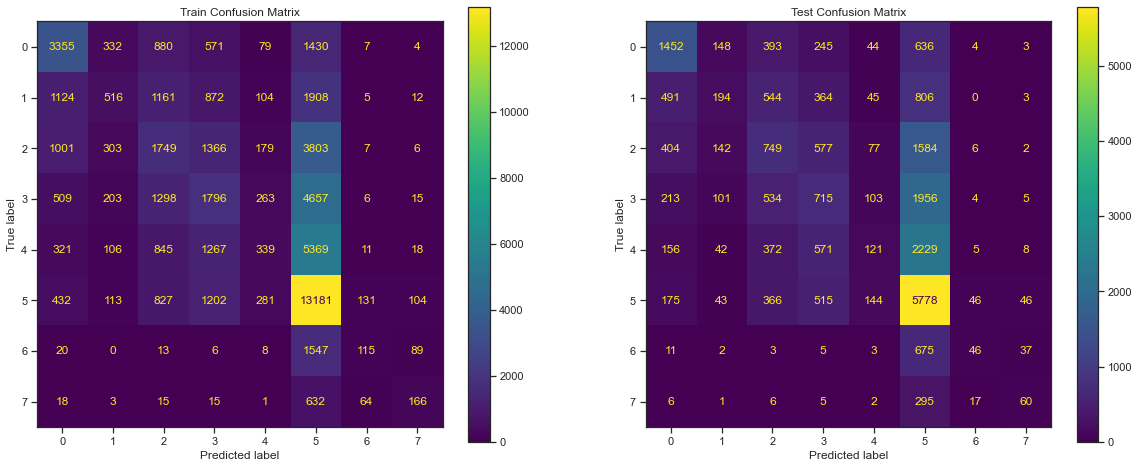

In [105]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(logreg, X_train, y_train, ax=ax0)
plot_confusion_matrix(logreg, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [106]:
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
False    35563
True     21217
Name: Price_range, dtype: int64


In [107]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
False    15220
True      9115
Name: Price_range, dtype: int64


### OBSERVATION:

-----> accuracy: 0.68

### Model Persistence

In [108]:
model_data_path = os.path.join(os.path.pardir,'models')
write_logreg_path = os.path.join(model_data_path, 'logistic.pkl')

In [109]:
import pickle

# make sure your model has already been fit before you pickle it!!
pickle.dump(logreg, open(write_logreg_path, "wb"))
print("Logistic model file was successfully saved!")

Logistic model file was successfully saved!


<br>

<a id="5.3"></a>
# 2. Random Forest with Pipelines

In [110]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('ss', StandardScaler()),
                     ('RF', RandomForestClassifier(random_state=42))])

pipeline.fit(X_train, y_train)


train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      6658
           1       0.69      0.62      0.65      5702
           2       0.66      0.62      0.64      8414
           3       0.63      0.62      0.63      8747
           4       0.64      0.60      0.62      8276
           5       0.73      0.83      0.78     16271
           6       0.90      0.78      0.84      1798
           7       0.93      0.87      0.90       914

    accuracy                           0.71     56780
   macro avg       0.75      0.72      0.73     56780
weighted avg       0.71      0.71      0.70     56780

              precision    recall  f1-score   support

           0       0.50      0.47      0.49      2925
           1       0.21      0.17      0.19      2447
           2       0.23      0.21      0.22      3541
           3       0.23      0.22      0.22      3631
           4       0.21      0.19      0.20      3504
           5       0.44 

Wall time: 6.01 s


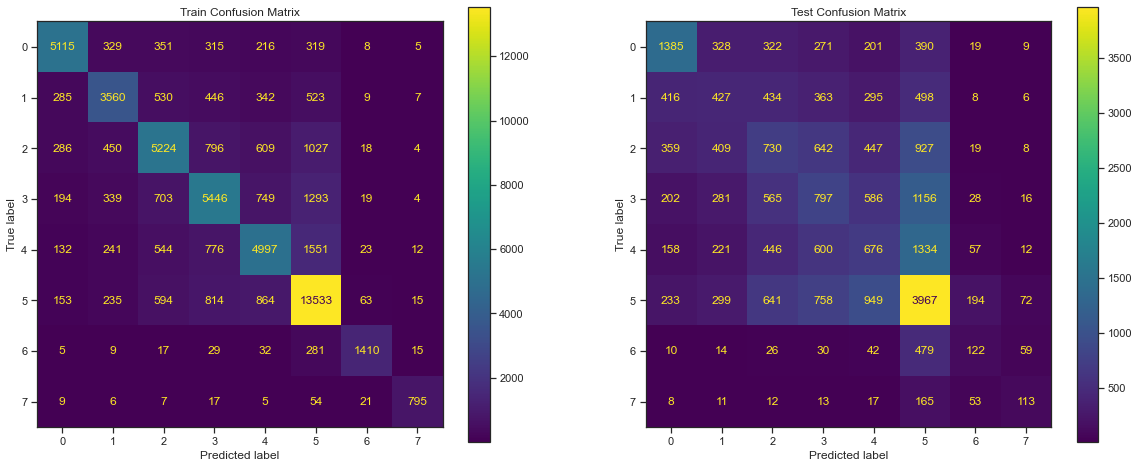

In [111]:
%%time
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(pipeline, X_train, y_train, ax=ax0)
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

### OBSERVATION:

-----> accuracy: 0.93

### Model Persistence

In [112]:
write_RandomForestClassifier_pipeline_path = os.path.join(model_data_path, 'randomForestClassifier_pipeline.pkl')

# make sure your model has already been fit before you pickle it!!
pickle.dump(pipeline, open(write_RandomForestClassifier_pipeline_path, "wb"))
print("RandomForestClassifier pipeline file was successfully saved!")

RandomForestClassifier pipeline file was successfully saved!


<hr>


<a id="5.4"></a>
# Combining GridSearch+Random Forest with Pipelines

In [113]:
%%time
# defining pipeline + setting up grid for gridsearch w Random Forest
pipeline2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=42))])

grid = [{'RF__max_depth': [4, 5], 
         'RF__min_samples_split': [5, 10], 
         'RF__min_samples_leaf': [3, 5]}]


# perform gridsearch
gridsearch = GridSearchCV(estimator=pipeline2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

gridsearch.fit(X_train, y_train)
test_preds = gridsearch.predict(X_test)


gridsearch.best_params_

Wall time: 3min 11s


{'RF__max_depth': 5, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 10}

In [114]:
gridsearch.best_estimator_['RF'].feature_importances_

array([6.68847937e-02, 1.17777139e-01, 3.40022649e-03, 5.52903910e-02,
       1.70145893e-02, 1.21657034e-03, 3.96461657e-02, 2.67183814e-03,
       5.34147823e-03, 4.00586819e-02, 0.00000000e+00, 1.67463735e-04,
       4.68418494e-03, 2.21072523e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.27263077e-04, 6.22119727e-04,
       1.02572548e-03, 2.99248938e-02, 9.21180469e-05, 0.00000000e+00,
       0.00000000e+00, 9.08092898e-03, 3.98476184e-02, 9.97389391e-03,
       2.03893376e-03, 9.31308117e-03, 0.00000000e+00, 7.92269399e-03,
       5.69166802e-02, 1.48219893e-05, 0.00000000e+00, 2.27753565e-04,
       4.45733659e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.05655718e-05, 7.87665477e-05, 2.08874763e-05,
       0.00000000e+00, 0.00000000e+00, 8.17781036e-05, 1.87741108e-04,
       5.28340682e-05, 0.00000000e+00, 0.00000000e+00, 1.33944826e-03,
       0.00000000e+00, 1.10843710e-05, 1.28717471e-05, 0.00000000e+00,
      

Wall time: 2.01 s


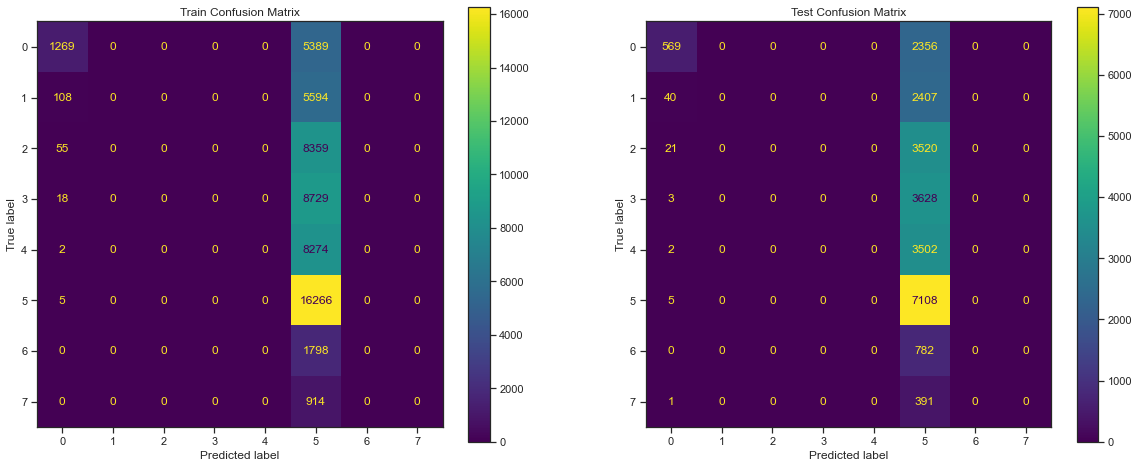

In [115]:
%%time
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(gridsearch, X_train, y_train, ax=ax0)
plot_confusion_matrix(gridsearch, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [116]:
%%time
from sklearn.metrics import classification_report

train_preds = gridsearch.predict(X_train)
test_preds = gridsearch.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.87      0.19      0.31      6658
           1       0.00      0.00      0.00      5702
           2       0.00      0.00      0.00      8414
           3       0.00      0.00      0.00      8747
           4       0.00      0.00      0.00      8276
           5       0.29      1.00      0.45     16271
           6       0.00      0.00      0.00      1798
           7       0.00      0.00      0.00       914

    accuracy                           0.31     56780
   macro avg       0.15      0.15      0.10     56780
weighted avg       0.19      0.31      0.17     56780

              precision    recall  f1-score   support

           0       0.89      0.19      0.32      2925
           1       0.00      0.00      0.00      2447
           2       0.00      0.00      0.00      3541
           3       0.00      0.00      0.00      3631
           4       0.00      0.00      0.00      3504
           5       0.30 

### OBSERVATION:

-----> accuracy: 0.34

### Model Persistence

In [117]:
write_RandomForestClassifier_GridSearchCV_pipeline_path = os.path.join(model_data_path, 'randomForestClassifier_GridSearchCV_pipeline.pkl')

# make sure your model has already been fit before you pickle it!!
pickle.dump(gridsearch, open(write_RandomForestClassifier_GridSearchCV_pipeline_path, "wb"))
print("GridSearch+Random Forest with Pipelines model was successfully saved!")

GridSearch+Random Forest with Pipelines model was successfully saved!


<br>

# 3. K-Nearest Neighbors with GridSearchCV

In [118]:
%%time

# define the parameters want to search through
knn_grid = {'n_neighbors': [1, 2, 3, 4, 5],
           'weights': ['uniform', 'distance']}

# instantiate gridsearch
knn_search = GridSearchCV(KNeighborsClassifier(), knn_grid, scoring='accuracy', verbose=1)

# fit the grid
knn_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 16min 45s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [119]:
knn_search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [120]:
test_preds = knn_search.predict(X_test)

Wall time: 4min 36s


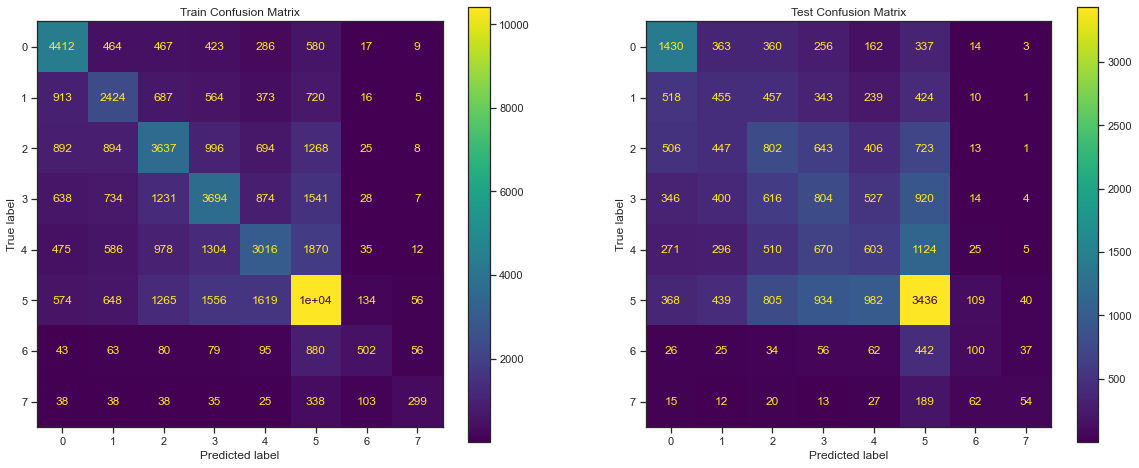

In [121]:
%%time
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(knn_search, X_train, y_train, ax=ax0)
plot_confusion_matrix(knn_search, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [122]:
print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.87      0.19      0.31      6658
           1       0.00      0.00      0.00      5702
           2       0.00      0.00      0.00      8414
           3       0.00      0.00      0.00      8747
           4       0.00      0.00      0.00      8276
           5       0.29      1.00      0.45     16271
           6       0.00      0.00      0.00      1798
           7       0.00      0.00      0.00       914

    accuracy                           0.31     56780
   macro avg       0.15      0.15      0.10     56780
weighted avg       0.19      0.31      0.17     56780

              precision    recall  f1-score   support

           0       0.41      0.49      0.45      2925
           1       0.19      0.19      0.19      2447
           2       0.22      0.23      0.22      3541
           3       0.22      0.22      0.22      3631
           4       0.20      0.17      0.19      3504
           5       0.45 

### OBSERVATION:

-----> accuracy: 0.99

### Model Persistence

In [123]:
write_KNeighborsClassifier_GridSearchCV_path = os.path.join(model_data_path, 'KNeighborsClassifier_GridSearchCV.pkl')

# make sure your model has already been fit before you pickle it!!
pickle.dump(knn_search, open(write_KNeighborsClassifier_GridSearchCV_path, "wb"))
print("GridSearch+Random Forest with Pipelines model was successfully saved!")

GridSearch+Random Forest with Pipelines model was successfully saved!


<a id="6"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>6. Conclusion</strong></h1>

> We ingested, prepared, and explored the Vietnam Housing Dataset (Hanoi) from Kaggle to serialize our model parameters to disk. We explored three different techniques for doing so. We were serializing scikit-learn models using pickle. Then, we discussed how it was essential to include the model preprocessing steps as a part of model serialization. We then put all of this together. It was preprocessing steps, model fitting into a single scikit-learn pipeline, and building a classification model to perform multi-classification on housing prices. 

> Check out `web_app` folder to find out how to deploy an exploratory process on Dash and the classification model to a Streamlit web application and use it for predictions. We will continue working with the same classification model and deploy it to a serverless environment for future improvement.

> We built multi-classification model would predict which house price ranges that an individual would willing top sell for and got Model K-Nearest Neighbors with GridSearchCV get the highest accuracy

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>7. References</strong></h1>

- The latest report on the conditions for the separation of plots in Hanoi in 2021:
> https://danviet.vn/dieu-kien-tach-thua-tai-ha-noi-nam-2021-moi-nhat-2021032906255103.htm
- Height Limitation:
> https://noithatmyhouse.com/quy-dinh-chieu-cao-xay-dung-nha-o/
- Legal Document:
> https://luatvietnam.vn/dat-dai-nha-o/su-dung-dat-khong-co-so-do-567-27503-article.html
- Report on a limited area for buy:
> https://luatvietnam.vn/dat-dai-nha-o/dat-nho-hon-dien-tich-toi-thieu-co-duoc-phep-mua-ban-567-22530-article.html
- Price of housing plot in Hanoi:
> https://tuoitre.vn/gia-dat-o-tai-ha-noi-cao-nhat-187-92-trieu-met-vuong-20191226102403571.htm
- Price of housing plot in Hanoi::
> https://laodong.vn/bat-dong-san/dat-hon-vang-nhung-tuyen-pho-giua-long-ha-noi-790770.ldo
- The latest report on the width and length conditions for the housing in Hanoi in 2021:
> https://luatminhkhue.vn/quy-dinh-ve-mat-san-voi-lo-gioi-de-duoc-phep-xay-dung-so-tang-.aspx
- Classification Report on Evaluation Metrics
> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>8. Appendix</strong></h1>

# Pipeline - End-to-end

> Makes the pipeline faster and easier to deploy. Ex. cd `../src/models/classification.py`